## Importing Required Libraries

In [1]:
# importing basic EDA libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters and style
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='viridis')

# labelencoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing  test train split 
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# metics to check the performance of the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score

## Data Dictionary

***Additional Information***

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
 - age (numeric)
 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")
- contact: contact communication type (categorical: "unknown","telephone","cellular") 
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- y - has the client subscribed a term deposit? (binary: "yes","no")

## Exploratory Data Analysis

In [2]:
# importing dataset
df = pd.read_csv('bank-full.csv')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
# checking the shape of data
df.shape

(9431, 17)

In [4]:
# getting column wise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9431 non-null   int64 
 1   job        9431 non-null   object
 2   marital    9431 non-null   object
 3   education  9431 non-null   object
 4   default    9431 non-null   object
 5   balance    9431 non-null   int64 
 6   housing    9431 non-null   object
 7   loan       9431 non-null   object
 8   contact    9431 non-null   object
 9   day        9431 non-null   int64 
 10  month      9431 non-null   object
 11  duration   9431 non-null   int64 
 12  campaign   9431 non-null   int64 
 13  pdays      9431 non-null   int64 
 14  previous   9431 non-null   int64 
 15  poutcome   9431 non-null   object
 16  y          9431 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [5]:
# statistics for numeric data
df.describe()

age       balance          day     duration     campaign  \
count  9431.000000   9431.000000  9431.000000  9431.000000  9431.000000   
mean     39.431662   1062.388400    15.515322   263.385007     2.619340   
std       9.286370   2549.931513     9.100660   250.087132     2.996701   
min      20.000000  -3372.000000     2.000000     0.000000     1.000000   
25%      32.000000     41.500000     7.000000   115.000000     1.000000   
50%      38.000000    340.000000    15.000000   191.000000     2.000000   
75%      46.000000   1088.500000    23.000000   322.000000     3.000000   
max      61.000000  58544.000000    30.000000  3366.000000    63.000000   

        pdays  previous  
count  9431.0    9431.0  
mean     -1.0       0.0  
std       0.0       0.0  
min      -1.0       0.0  
25%      -1.0       0.0  
50%      -1.0       0.0  
75%      -1.0       0.0  
max      -1.0       0.0

In [6]:
# getting stats for object data
df.describe(include = object)

job  marital  education default housing  loan  contact month  \
count          9431     9431       9431    9431    9431  9431     9431  9431   
unique           12        3          4       2       2     2        1     2   
top     blue-collar  married  secondary      no     yes    no  unknown   may   
freq           3090     5710       5418    9220    8257  8012     9431  7957   

       poutcome     y  
count      9431  9431  
unique        1     2  
top     unknown    no  
freq       9431  9105

In [7]:
# checking for null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

### Visualizations

<Axes: >

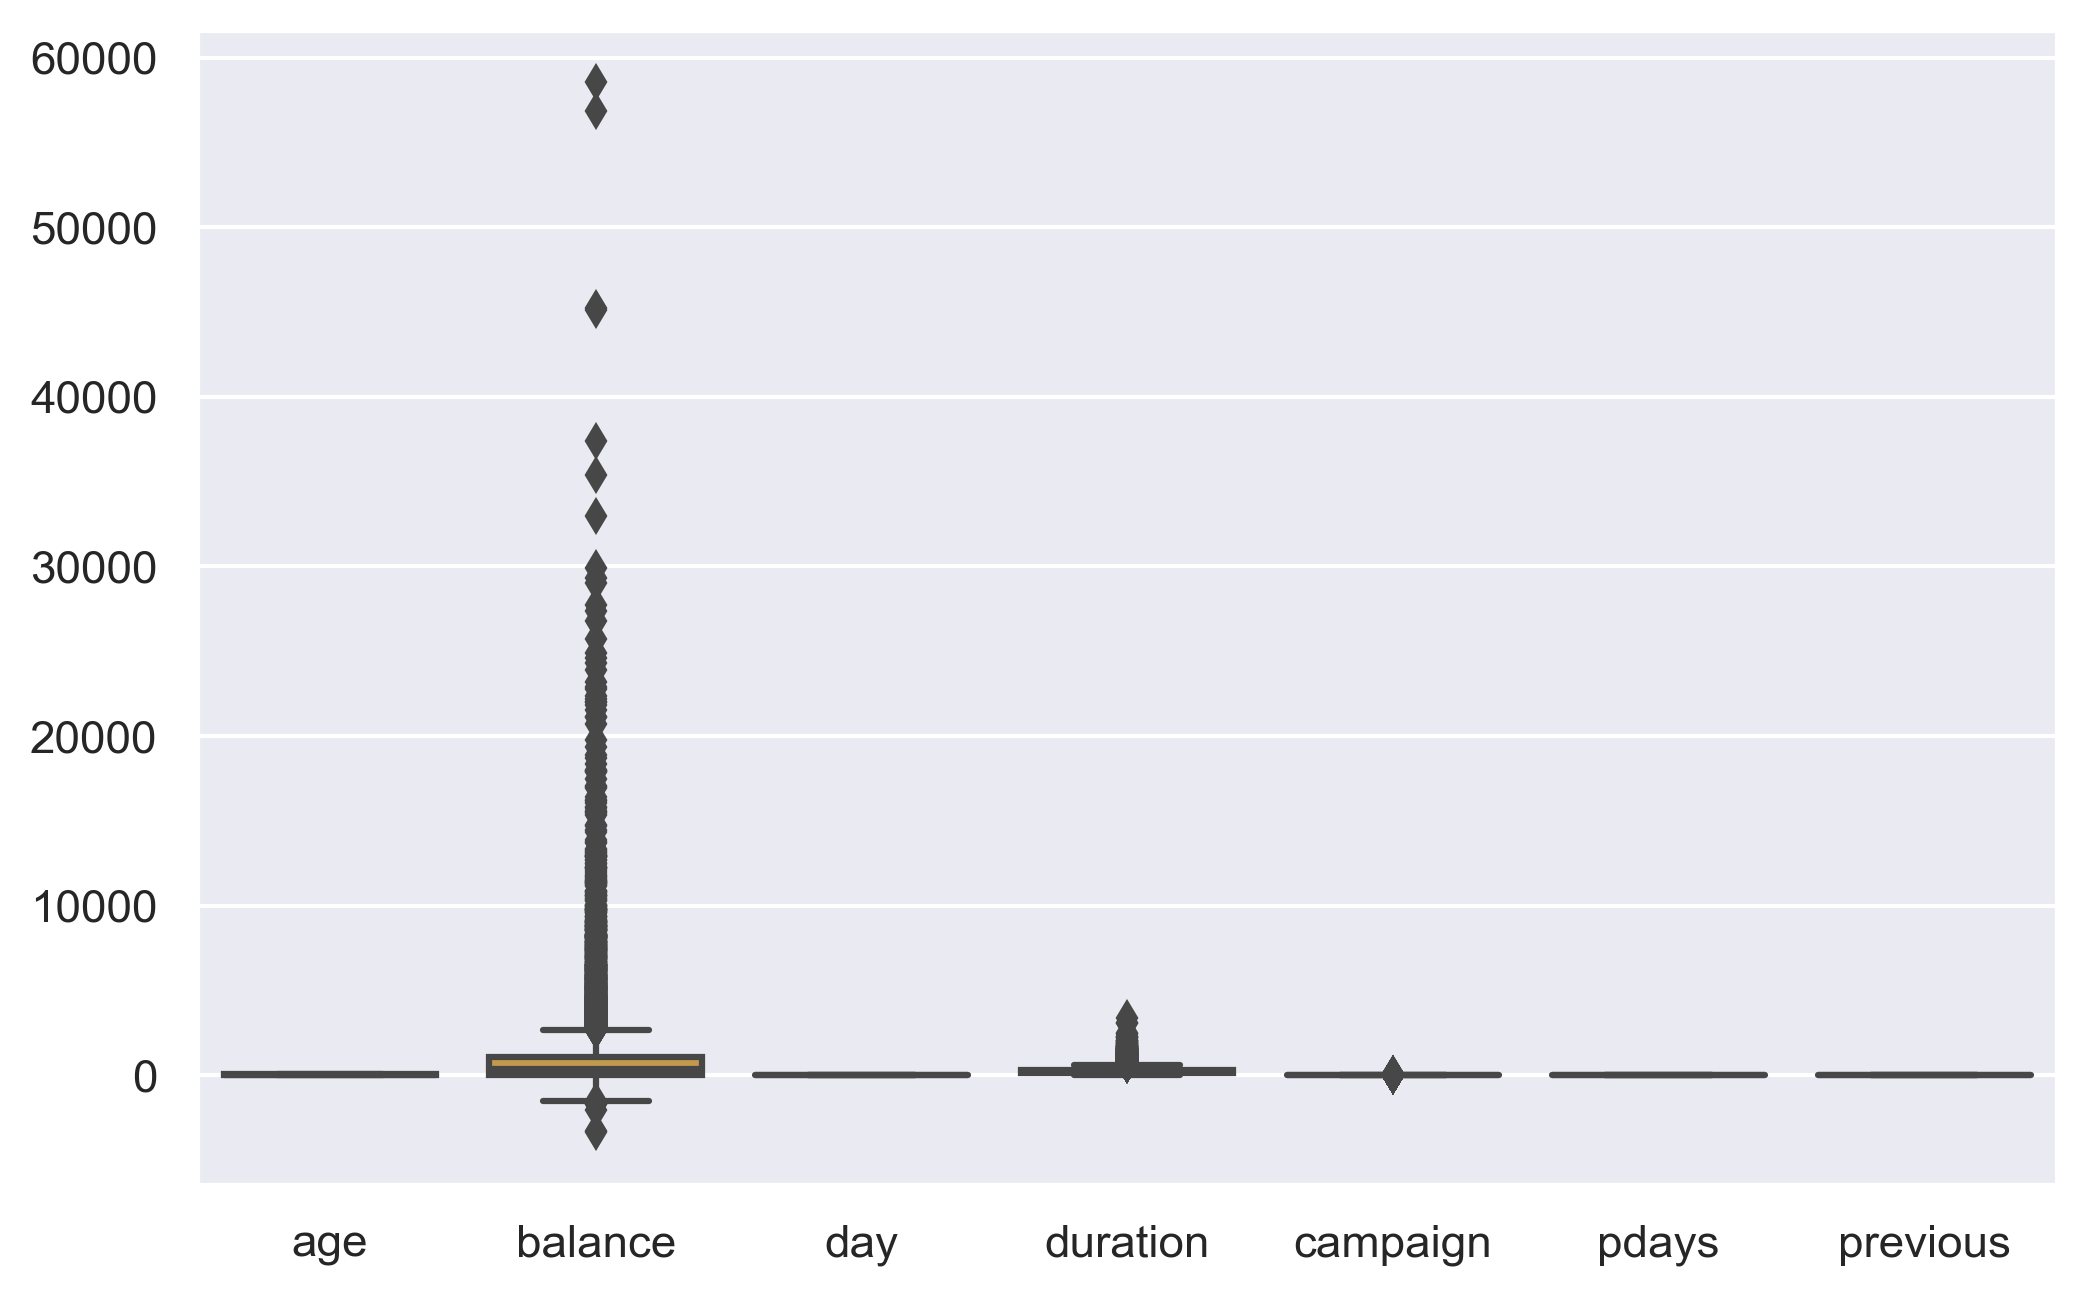

In [9]:
#checking for outliers uisng boxplot
sns.boxplot(data = df)

<Axes: xlabel='balance', ylabel='y'>

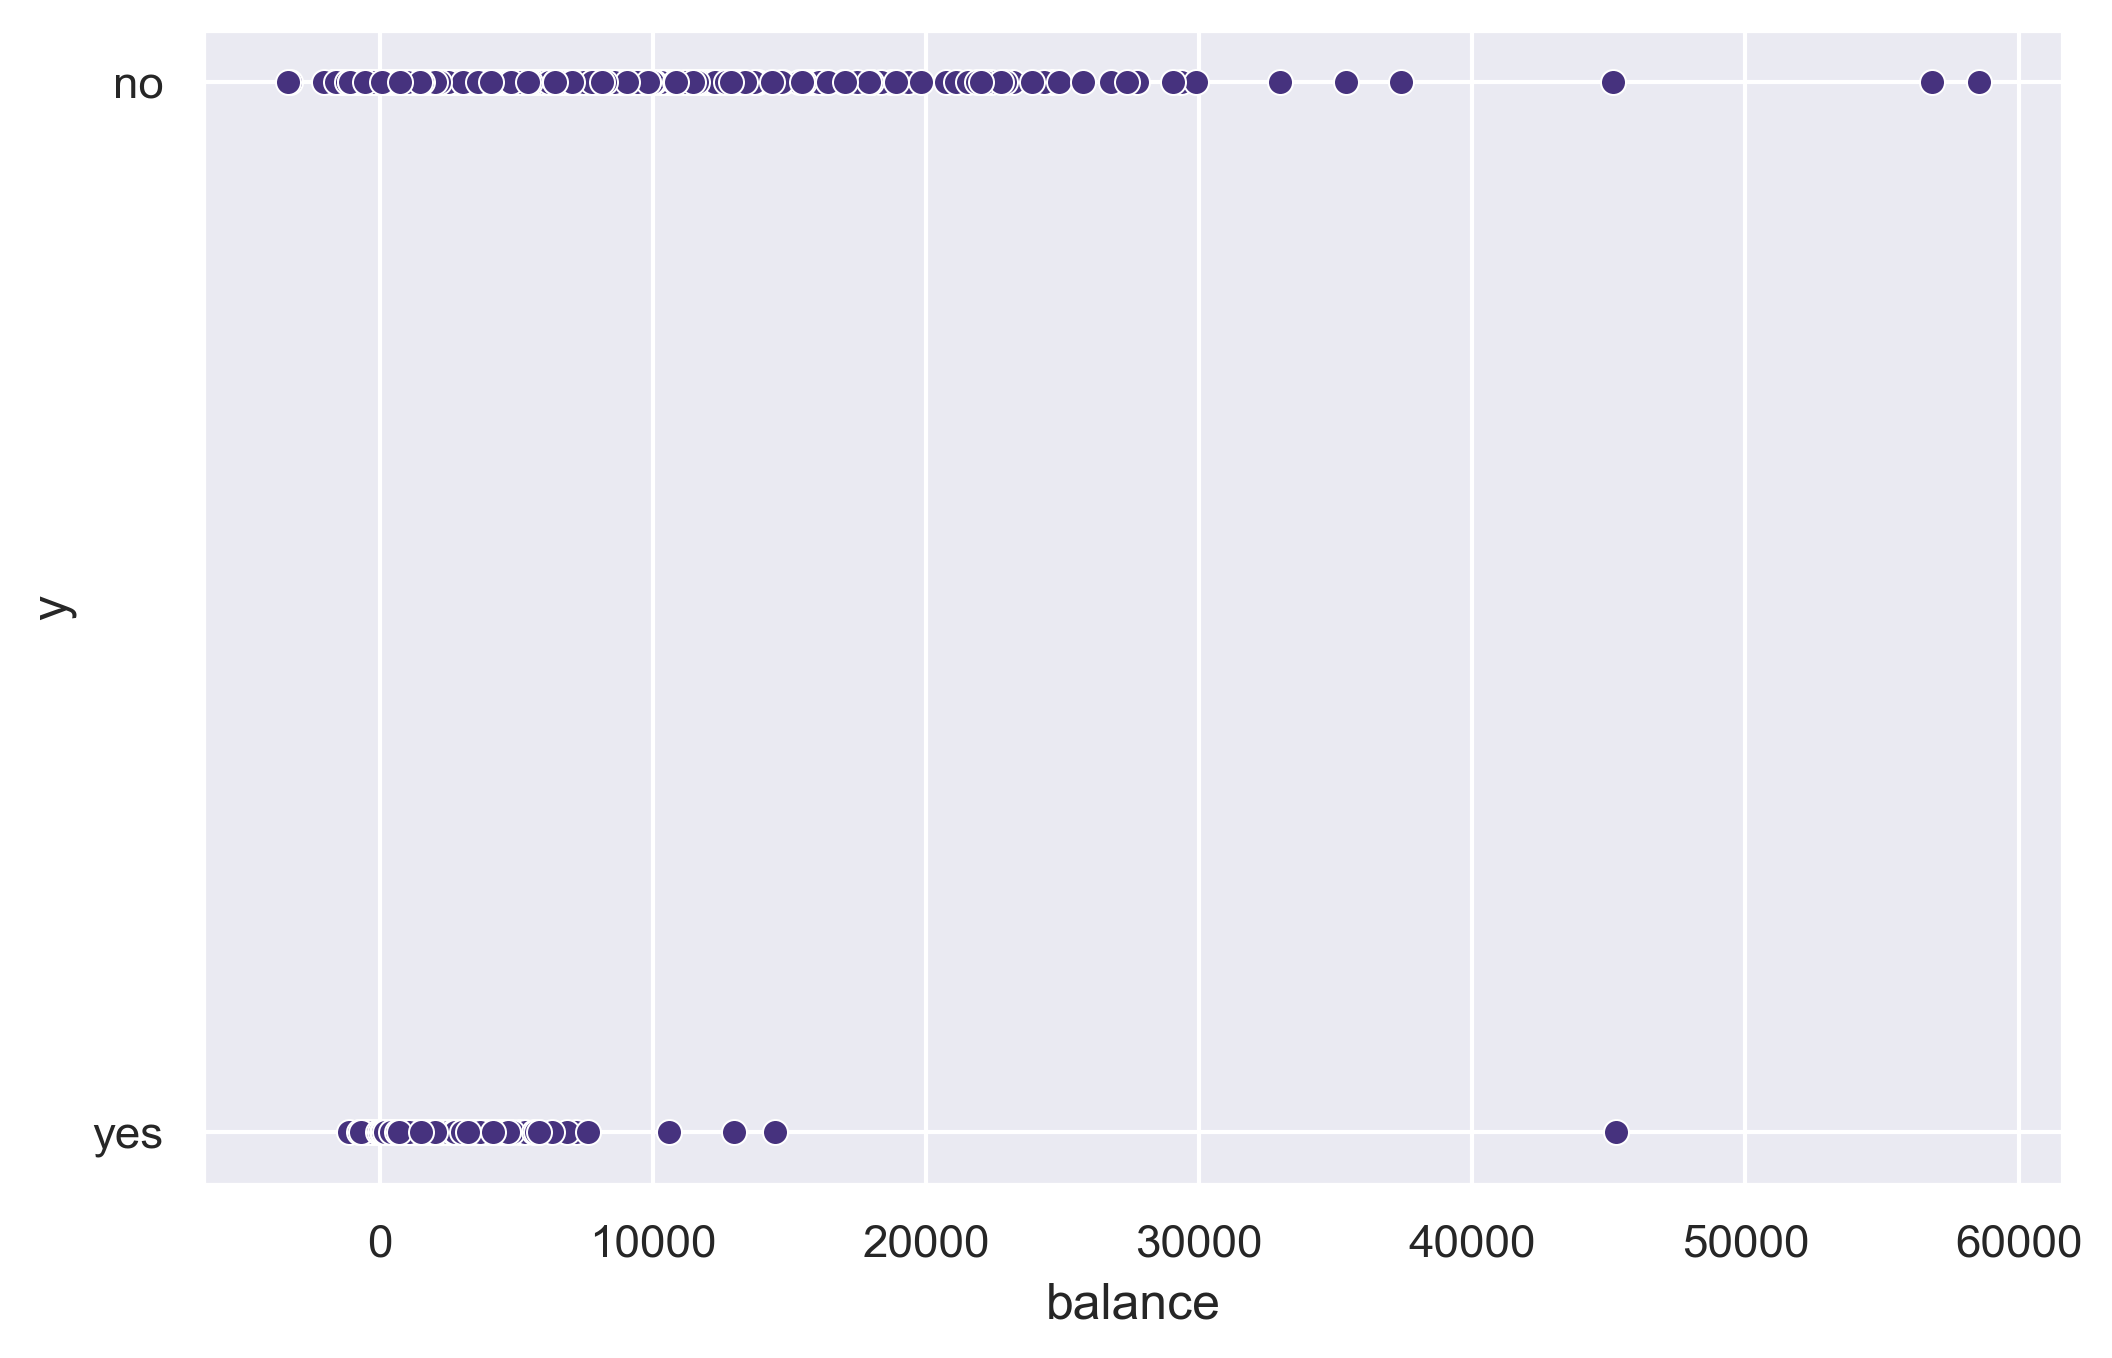

In [10]:
sns.scatterplot(data = df, x = 'balance', y = 'y' )

**As it is bank related data outliers can be helpfull in identifying extreme cases & to build a more robust model**

In [11]:
# getting values unique entries of target label
df['y'].value_counts()

no     9105
yes     326
Name: y, dtype: int64

Text(0.5, 1.0, 'Category count in Target column')

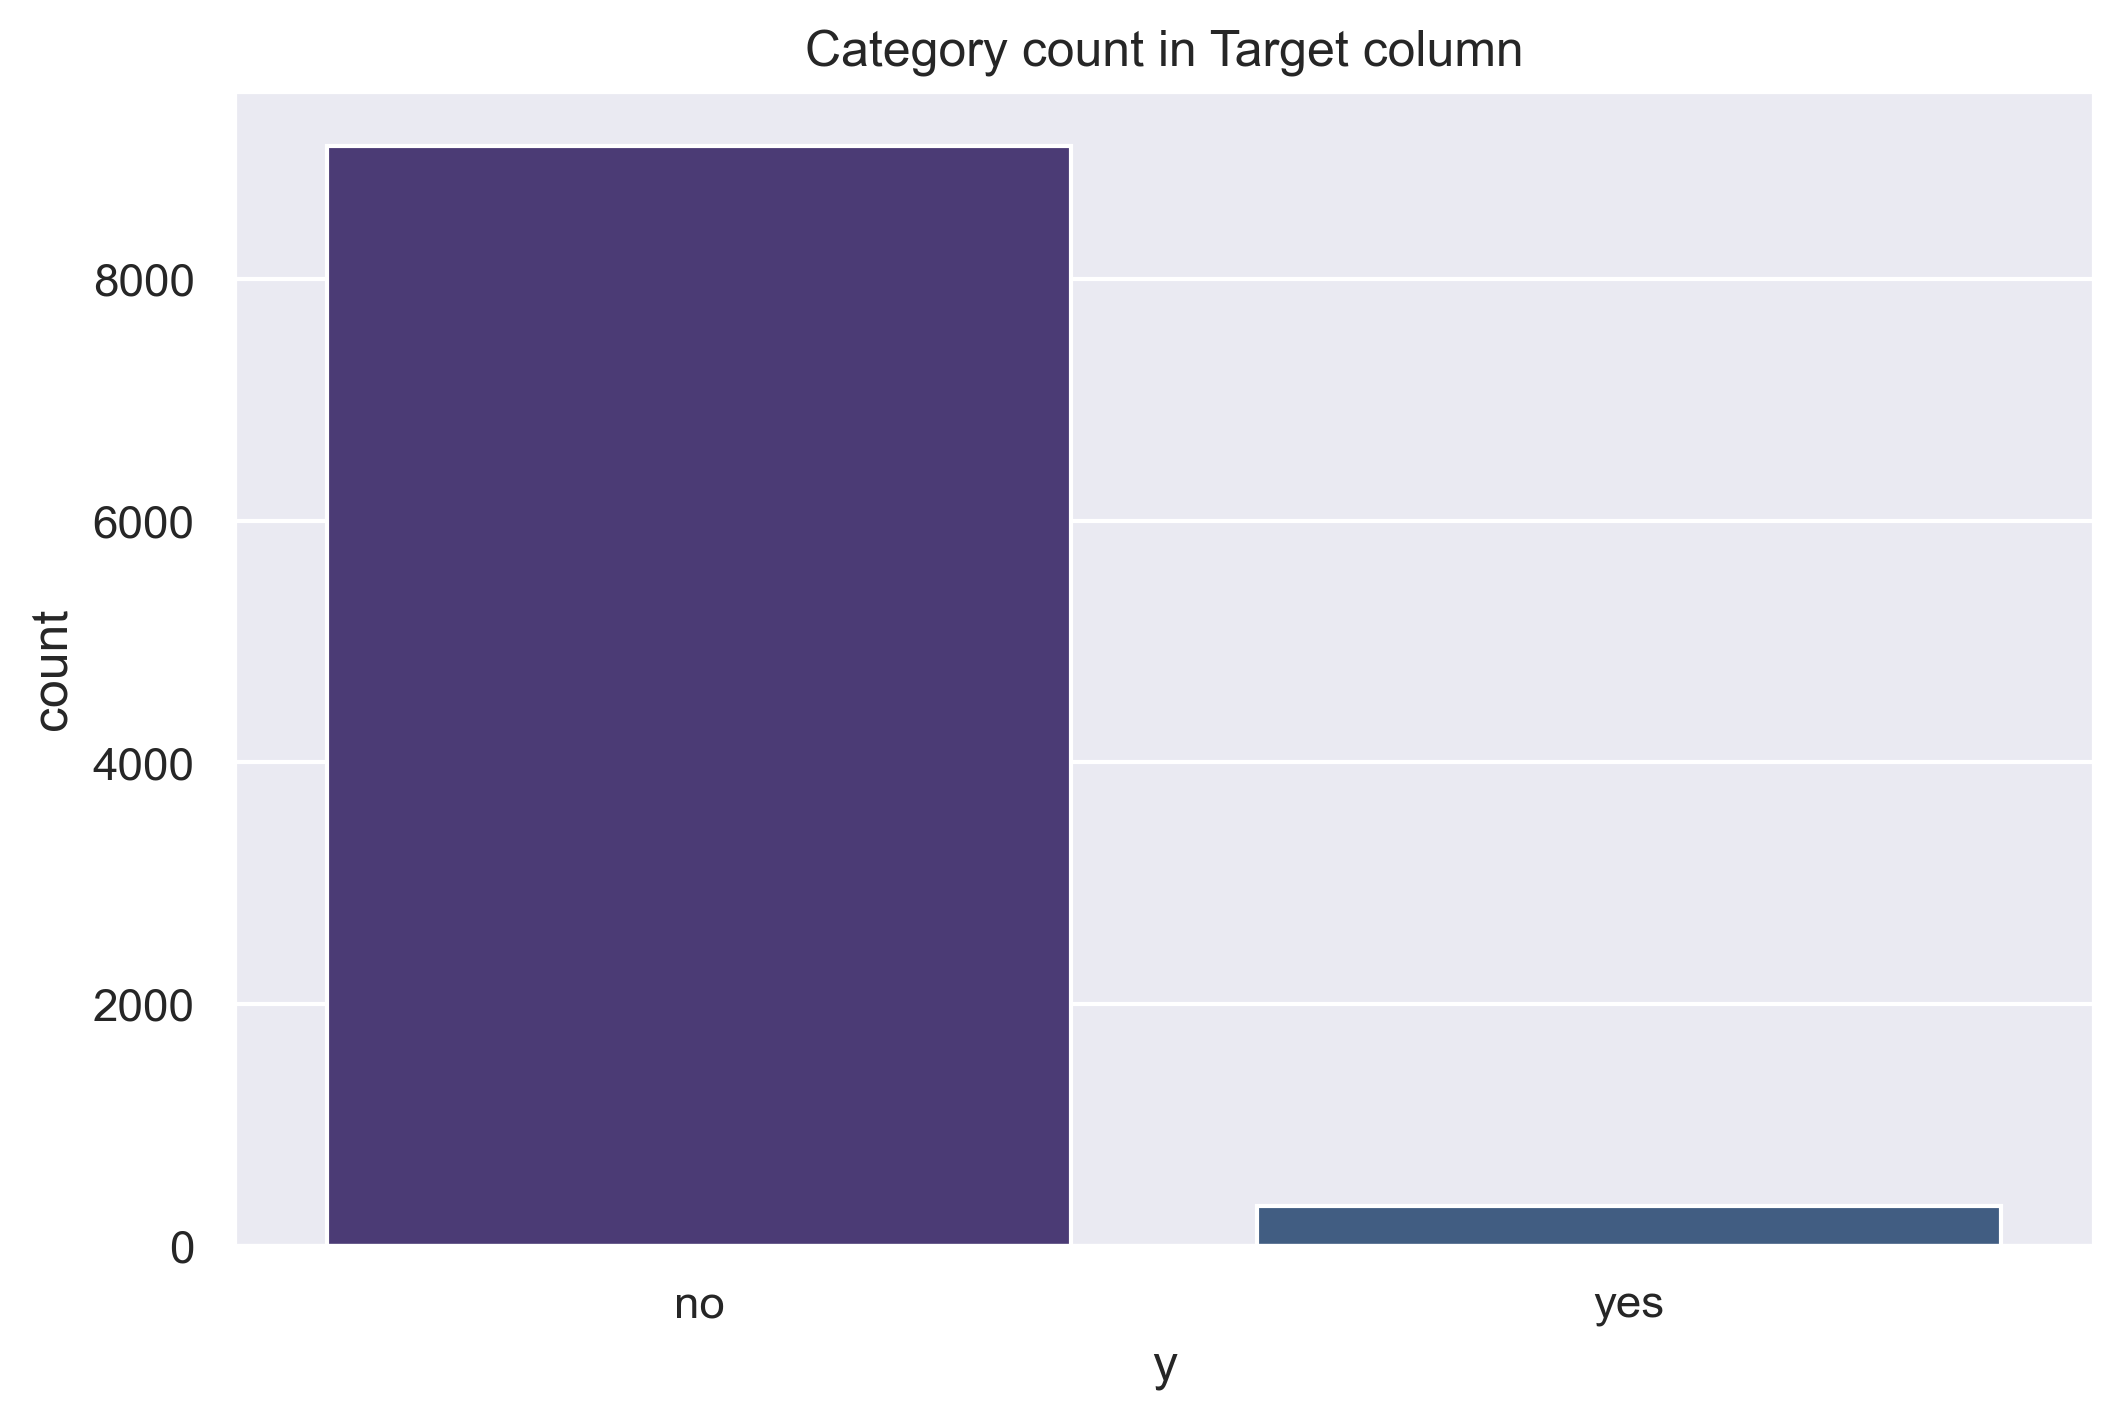

In [12]:
# visualization of target variable
sns.countplot(data = df, x = 'y')
plt.title('Category count in Target column')

**target data is very imbalanced, this will affect our model's recall & precision score**

<Figure size 6000x6000 with 0 Axes>

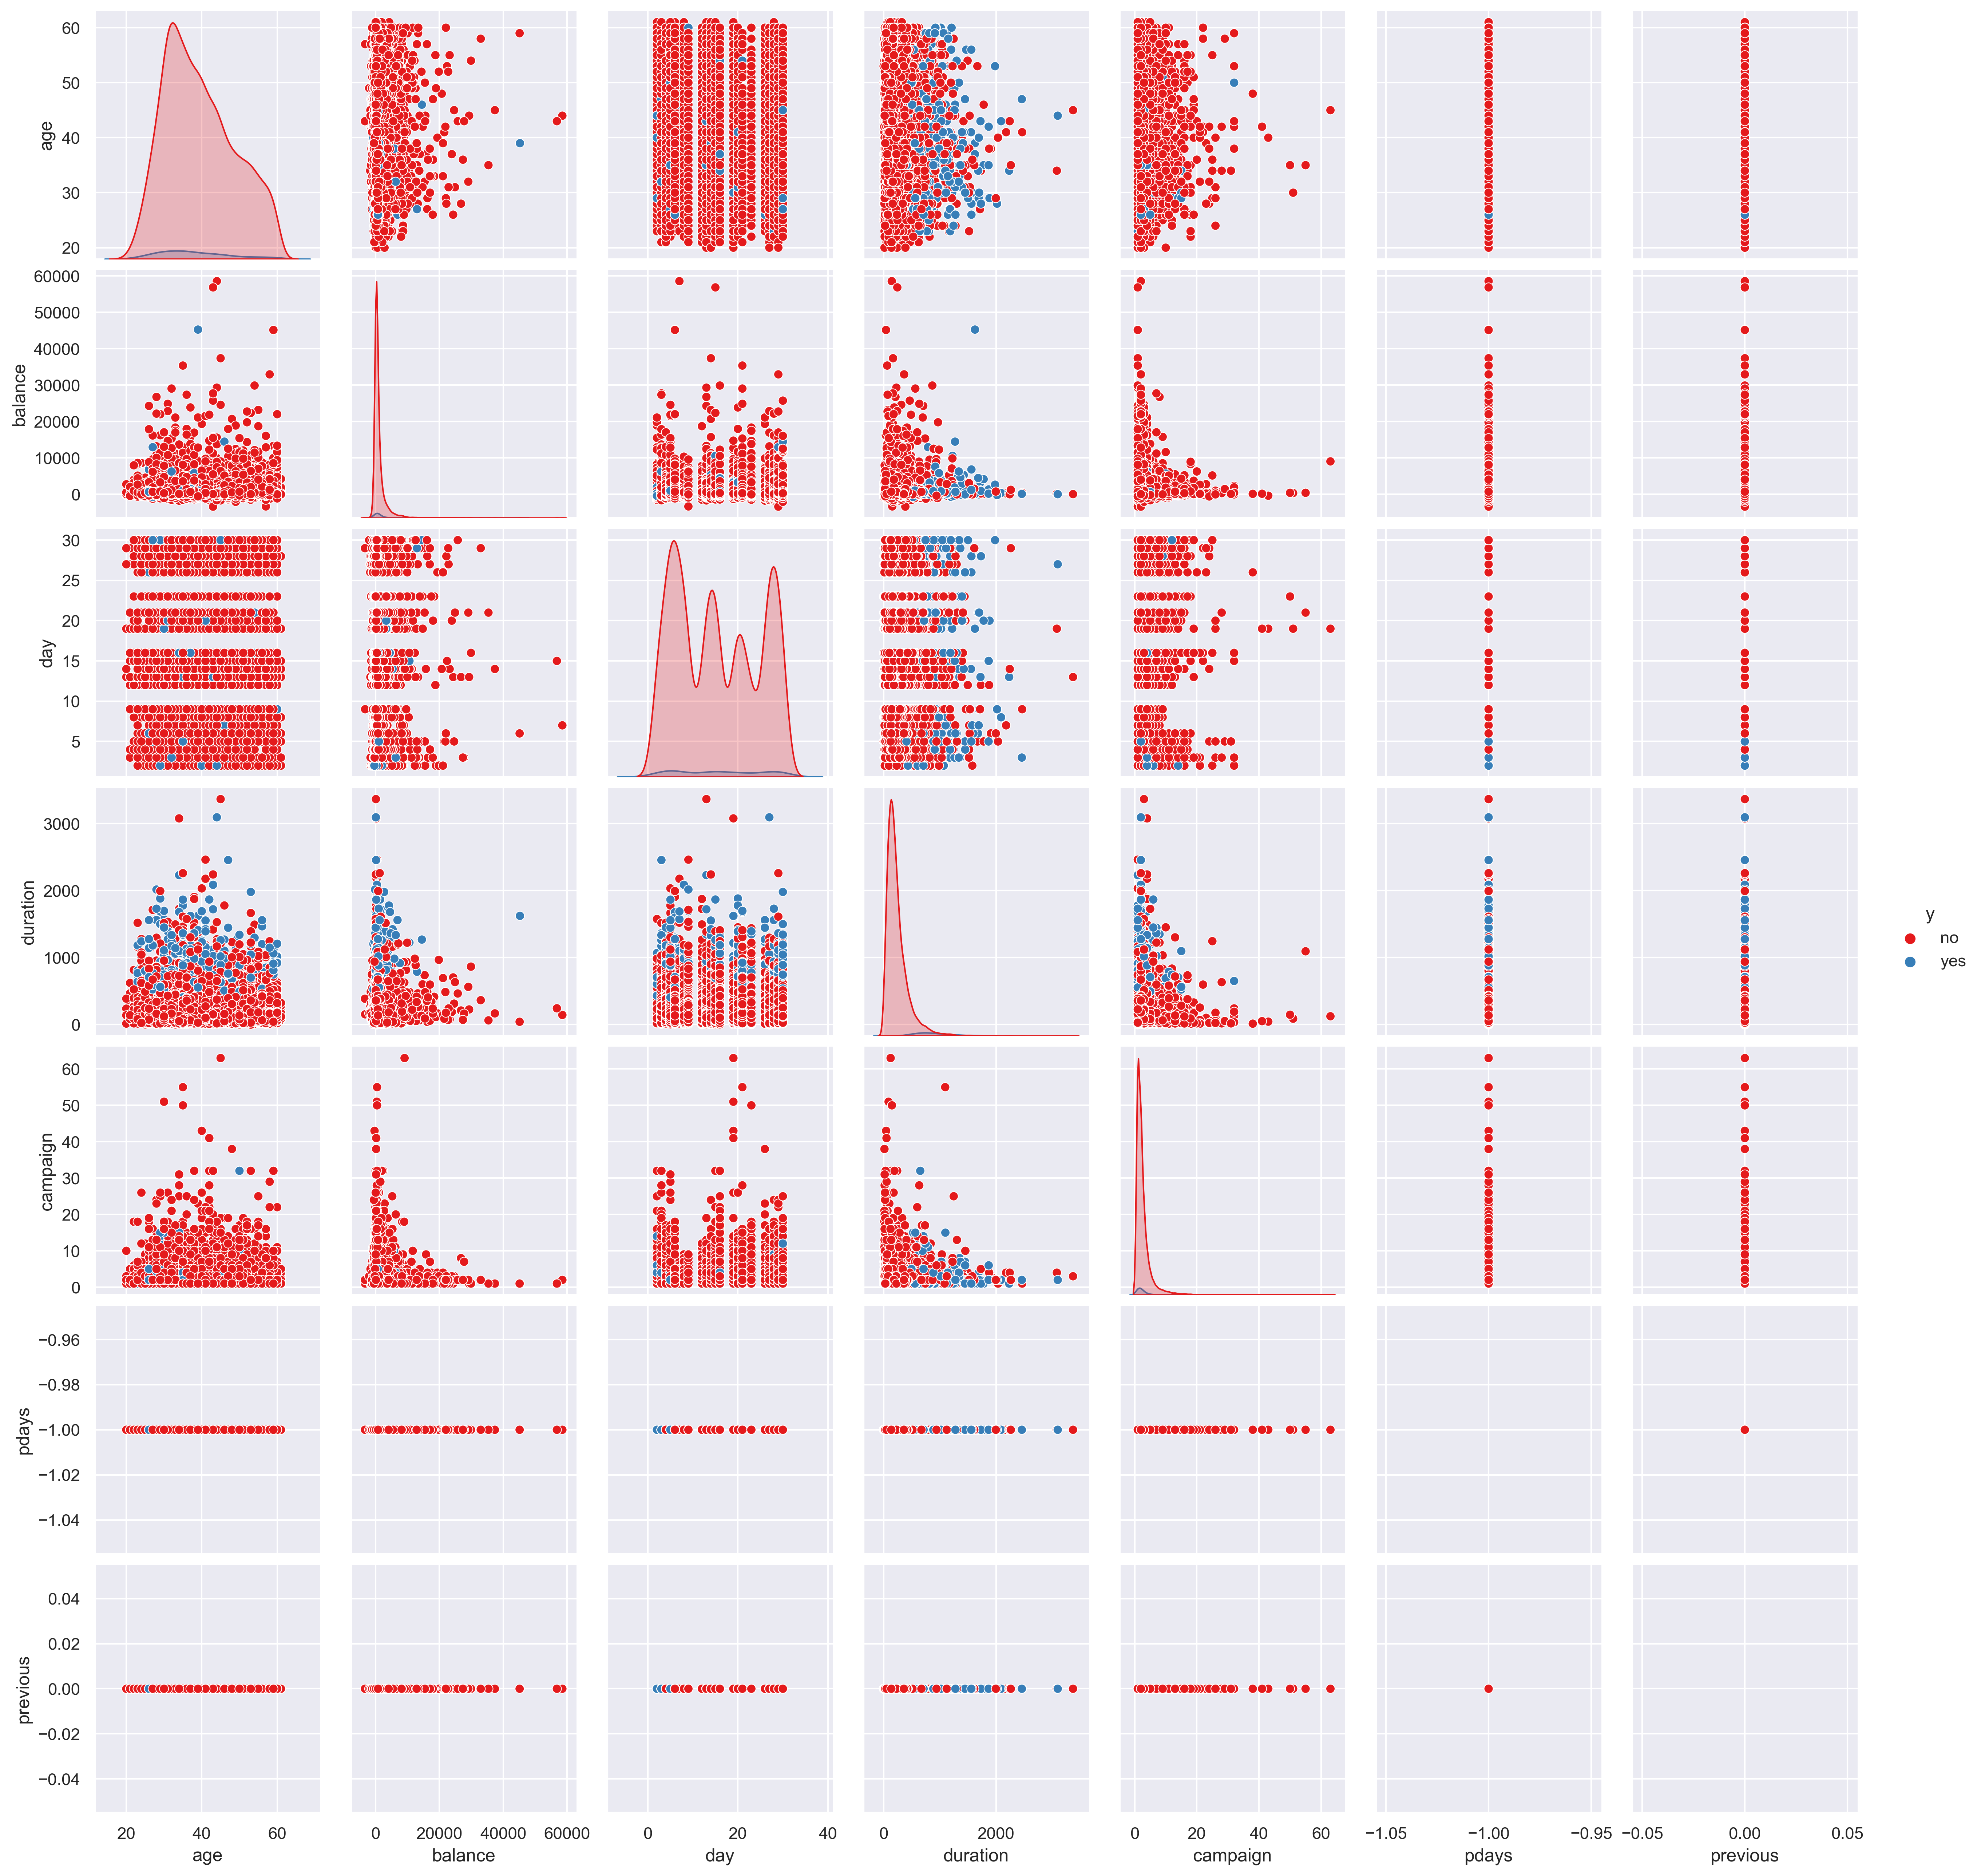

In [13]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df, hue = 'y', palette='Set1',)

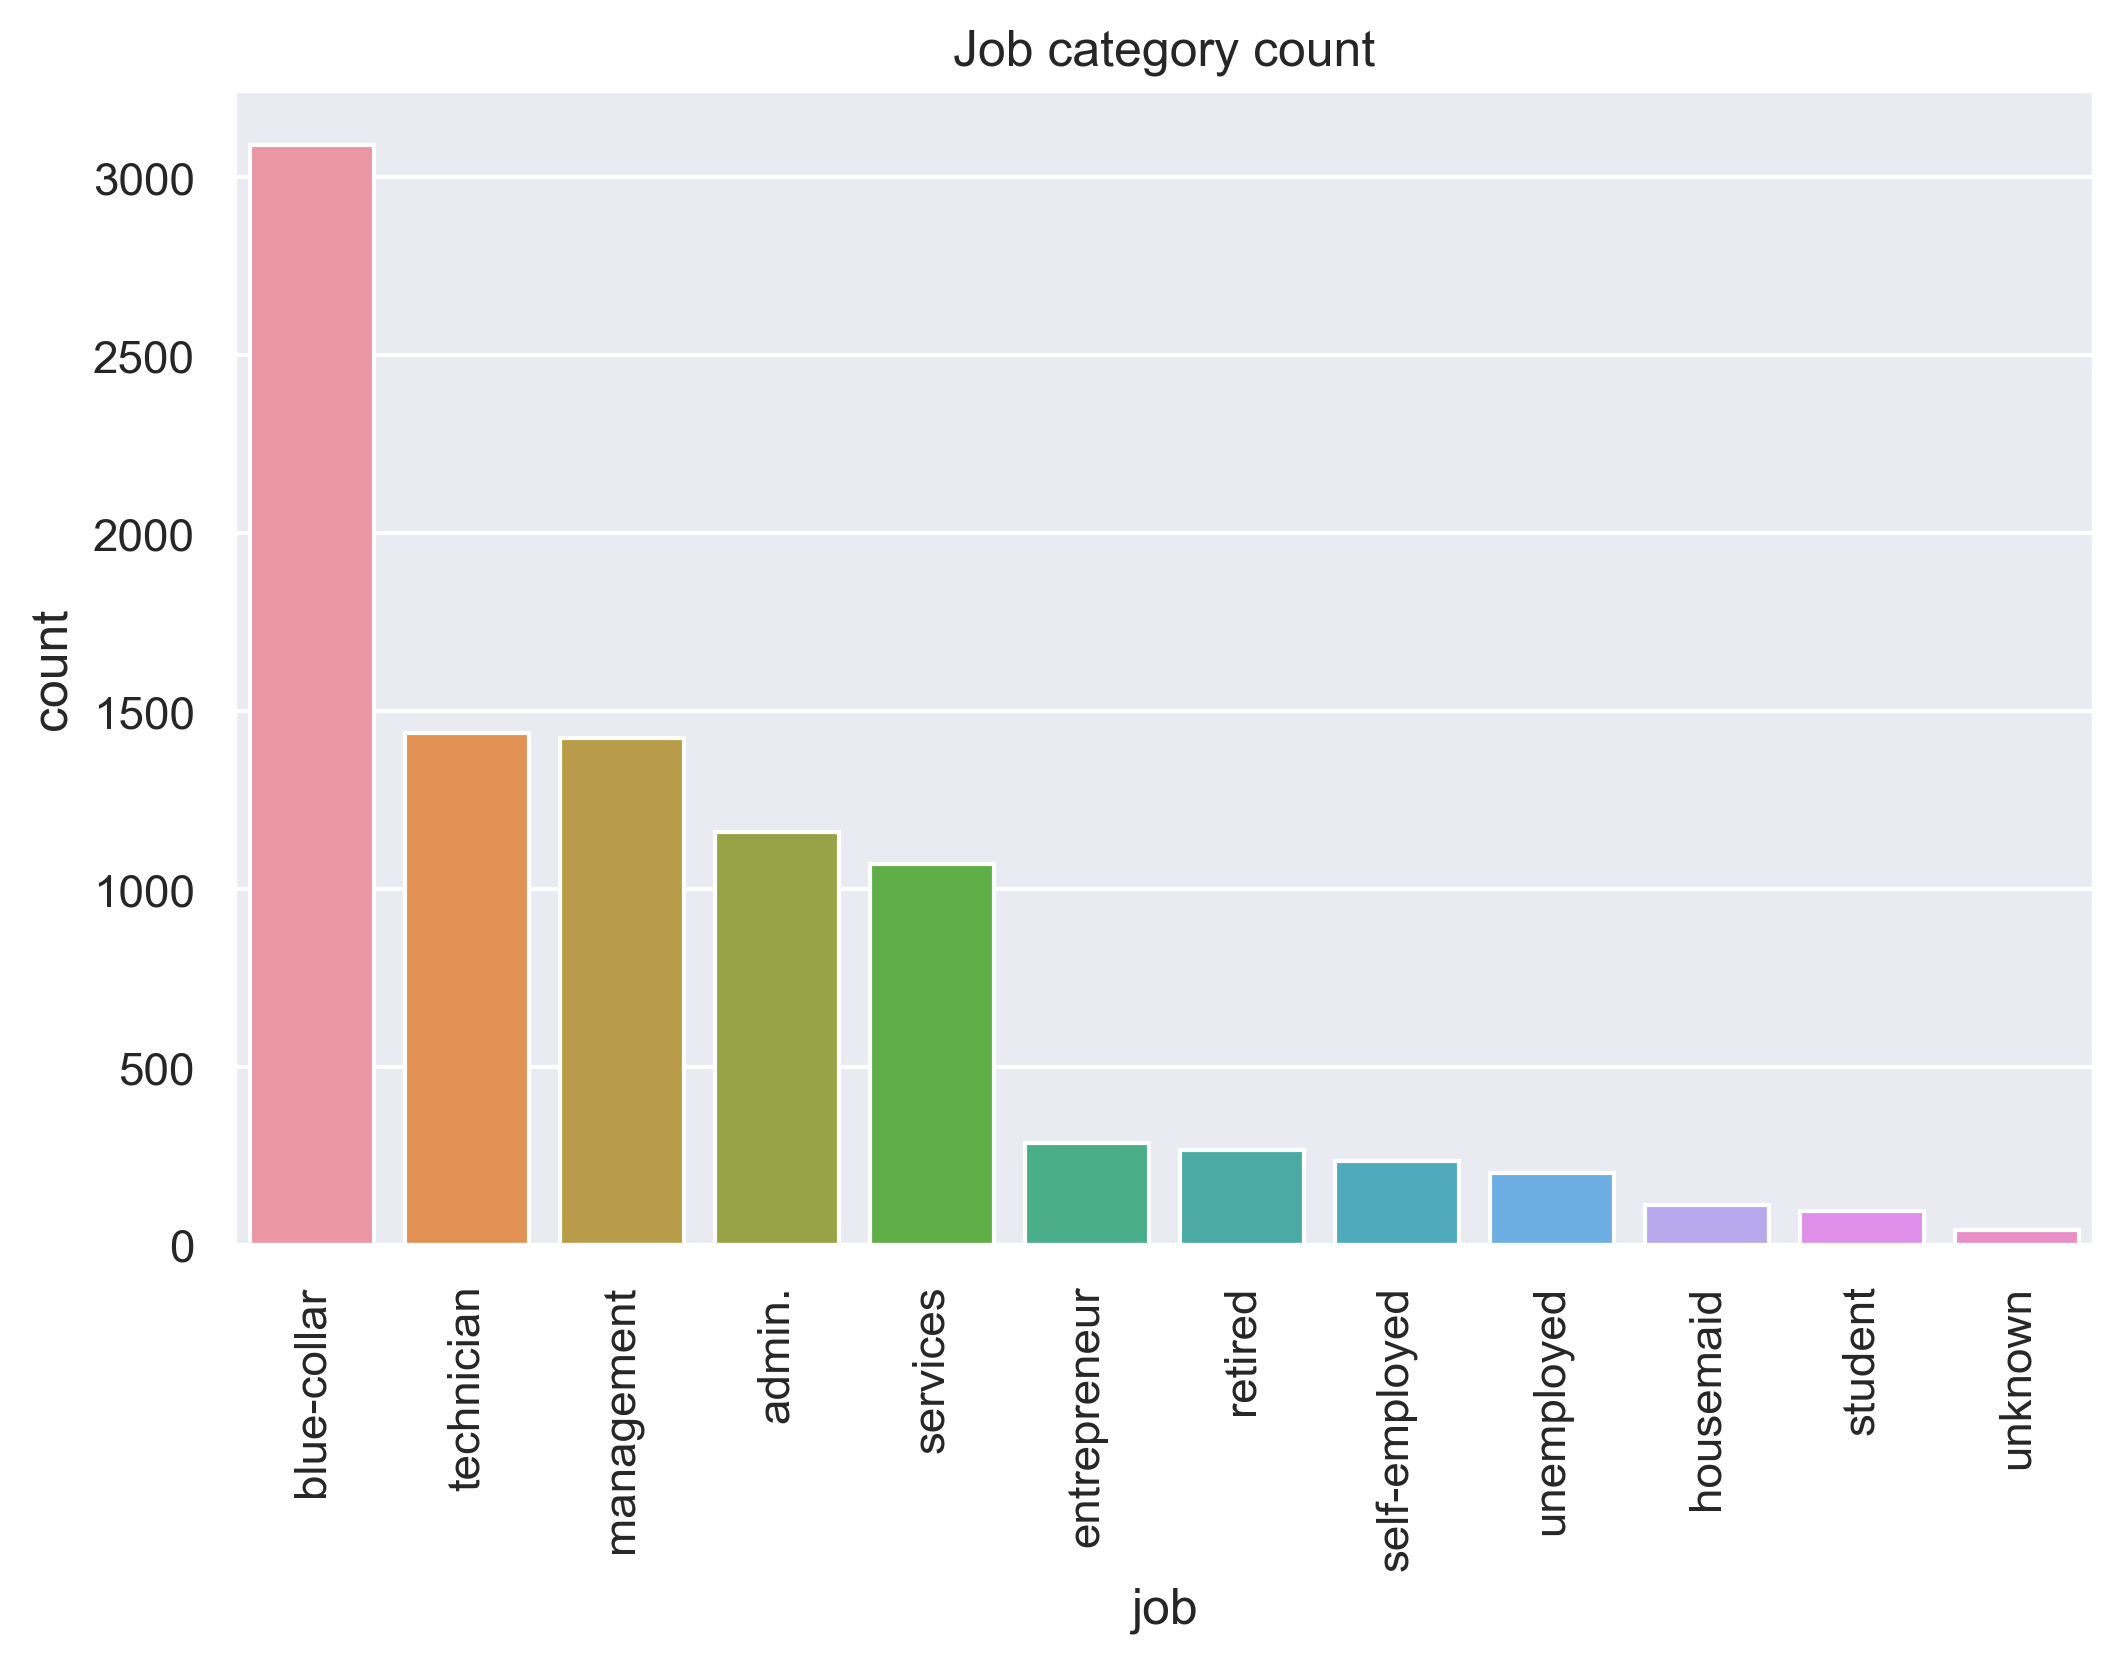

In [14]:
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Job category count')
plt.show()

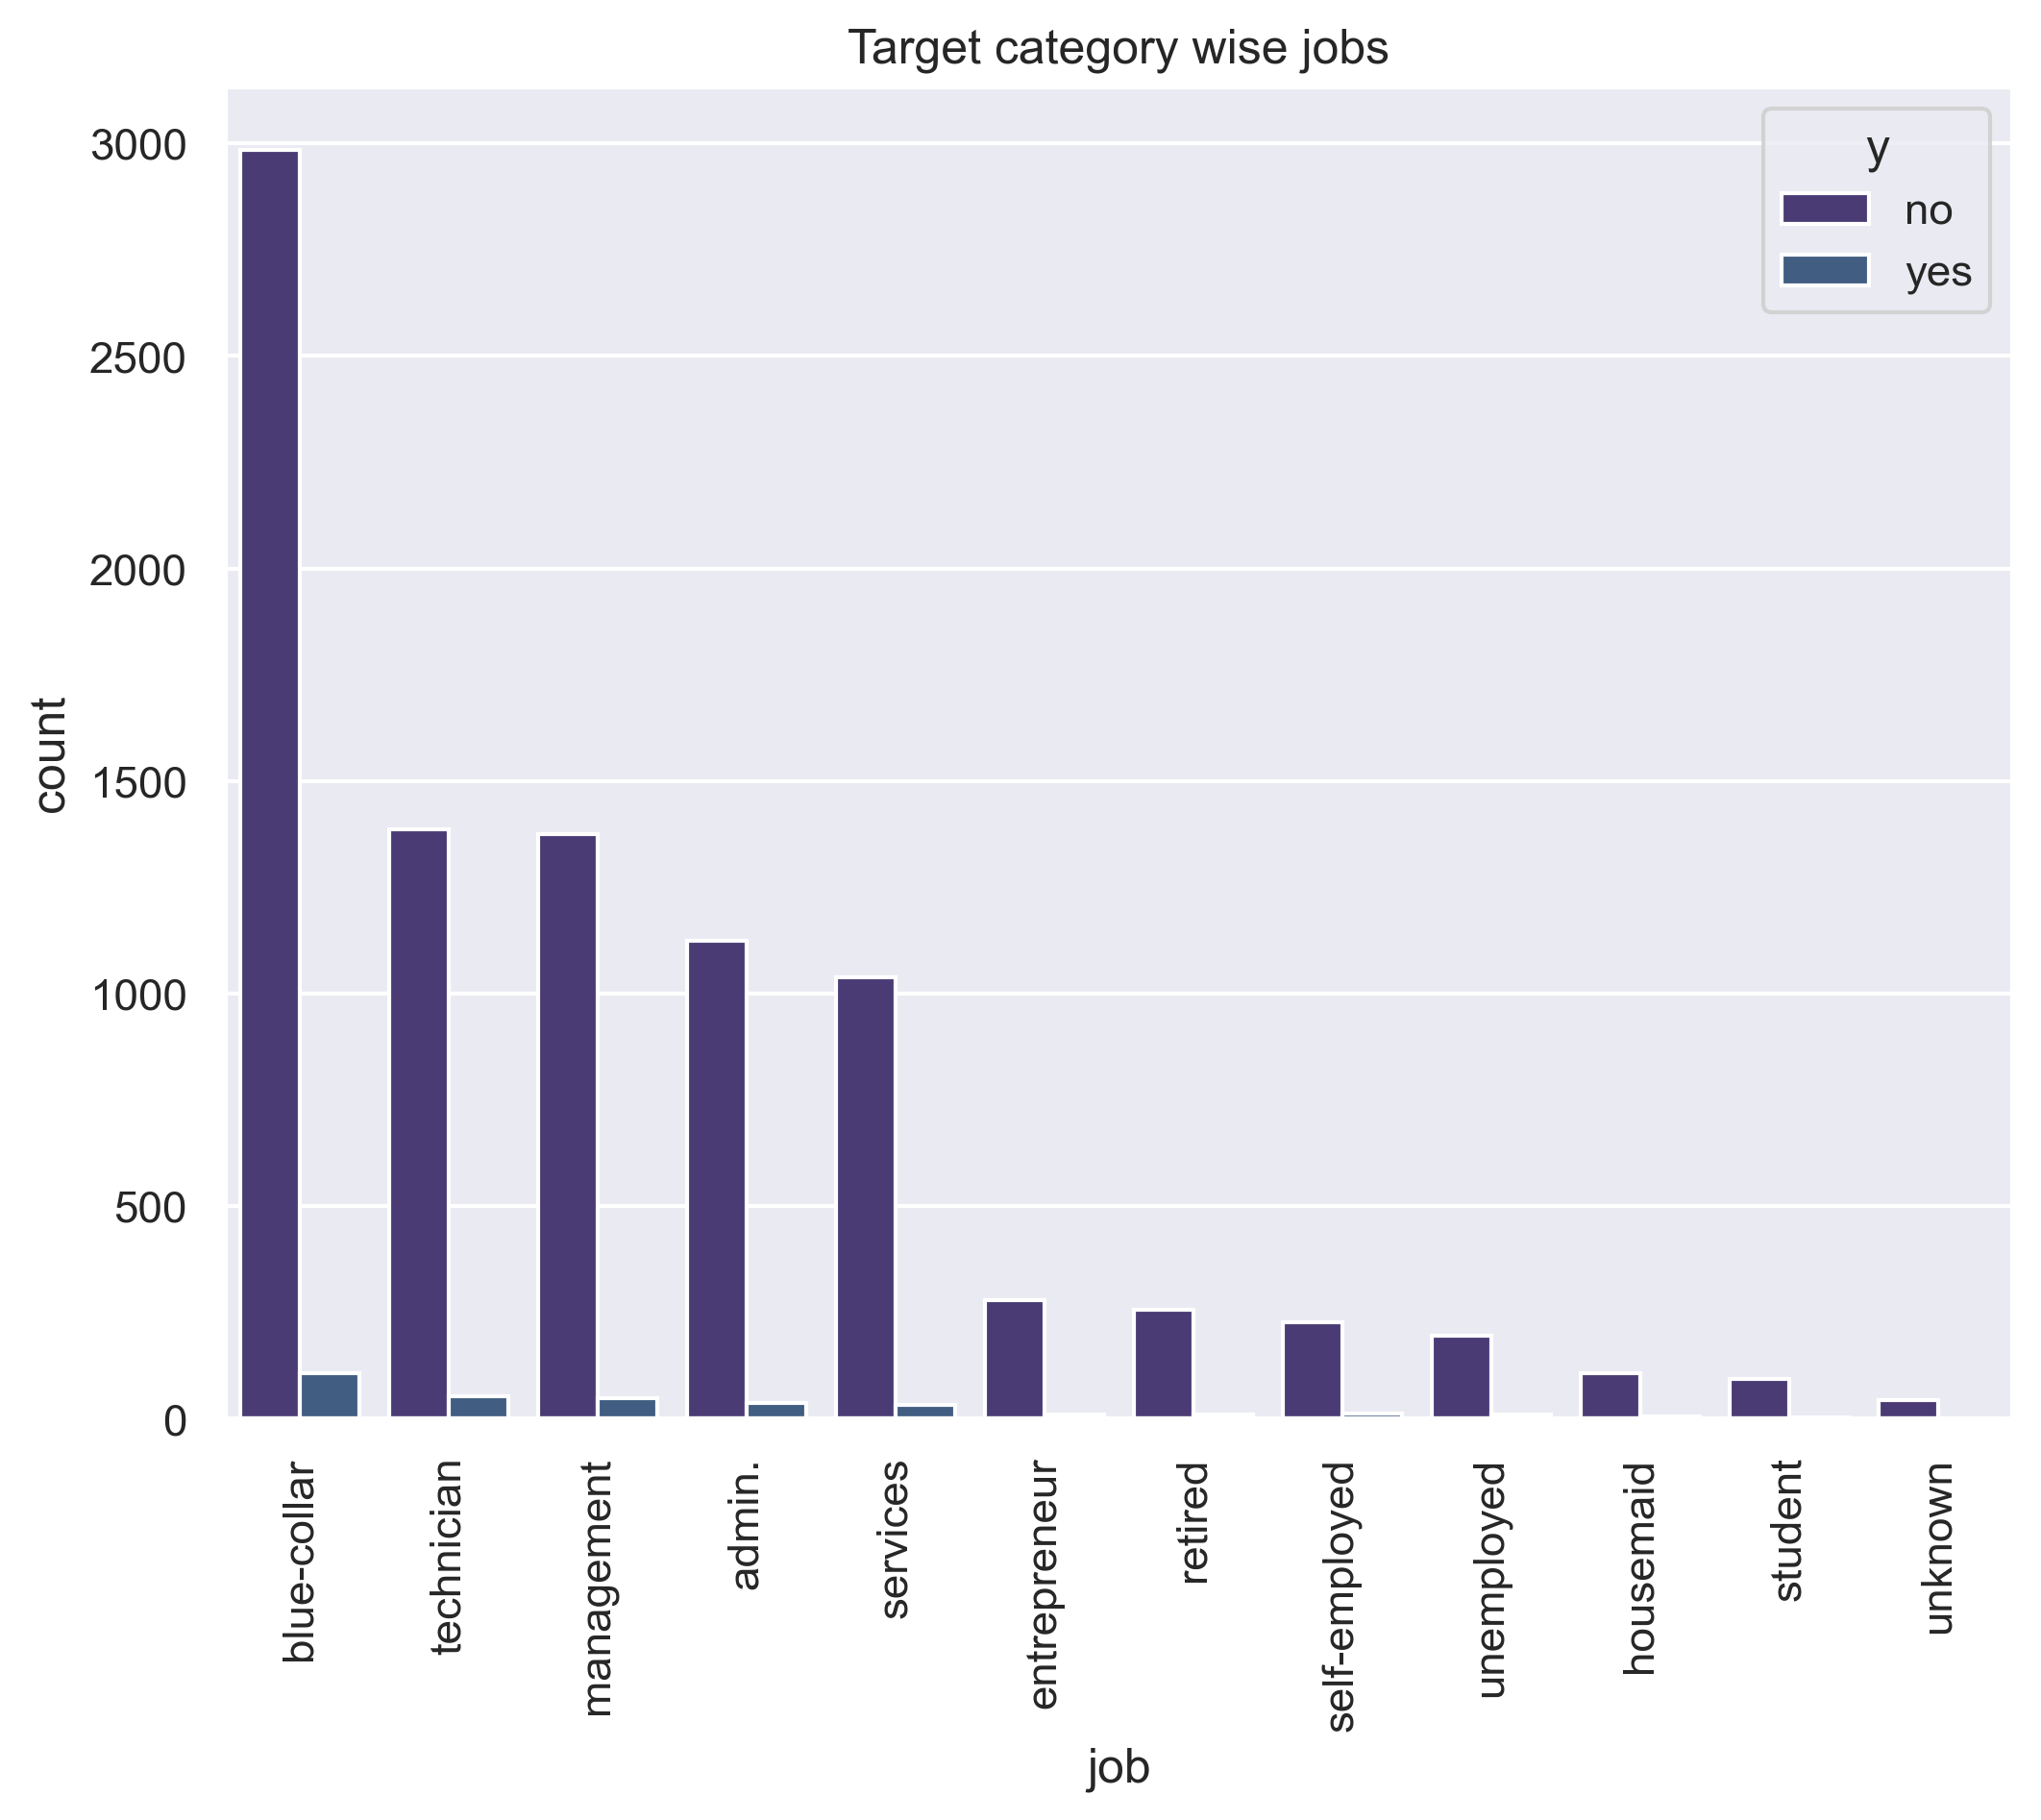

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index, hue = 'y')
plt.xticks(rotation = 90)
plt.title('Target category wise jobs')
plt.show()

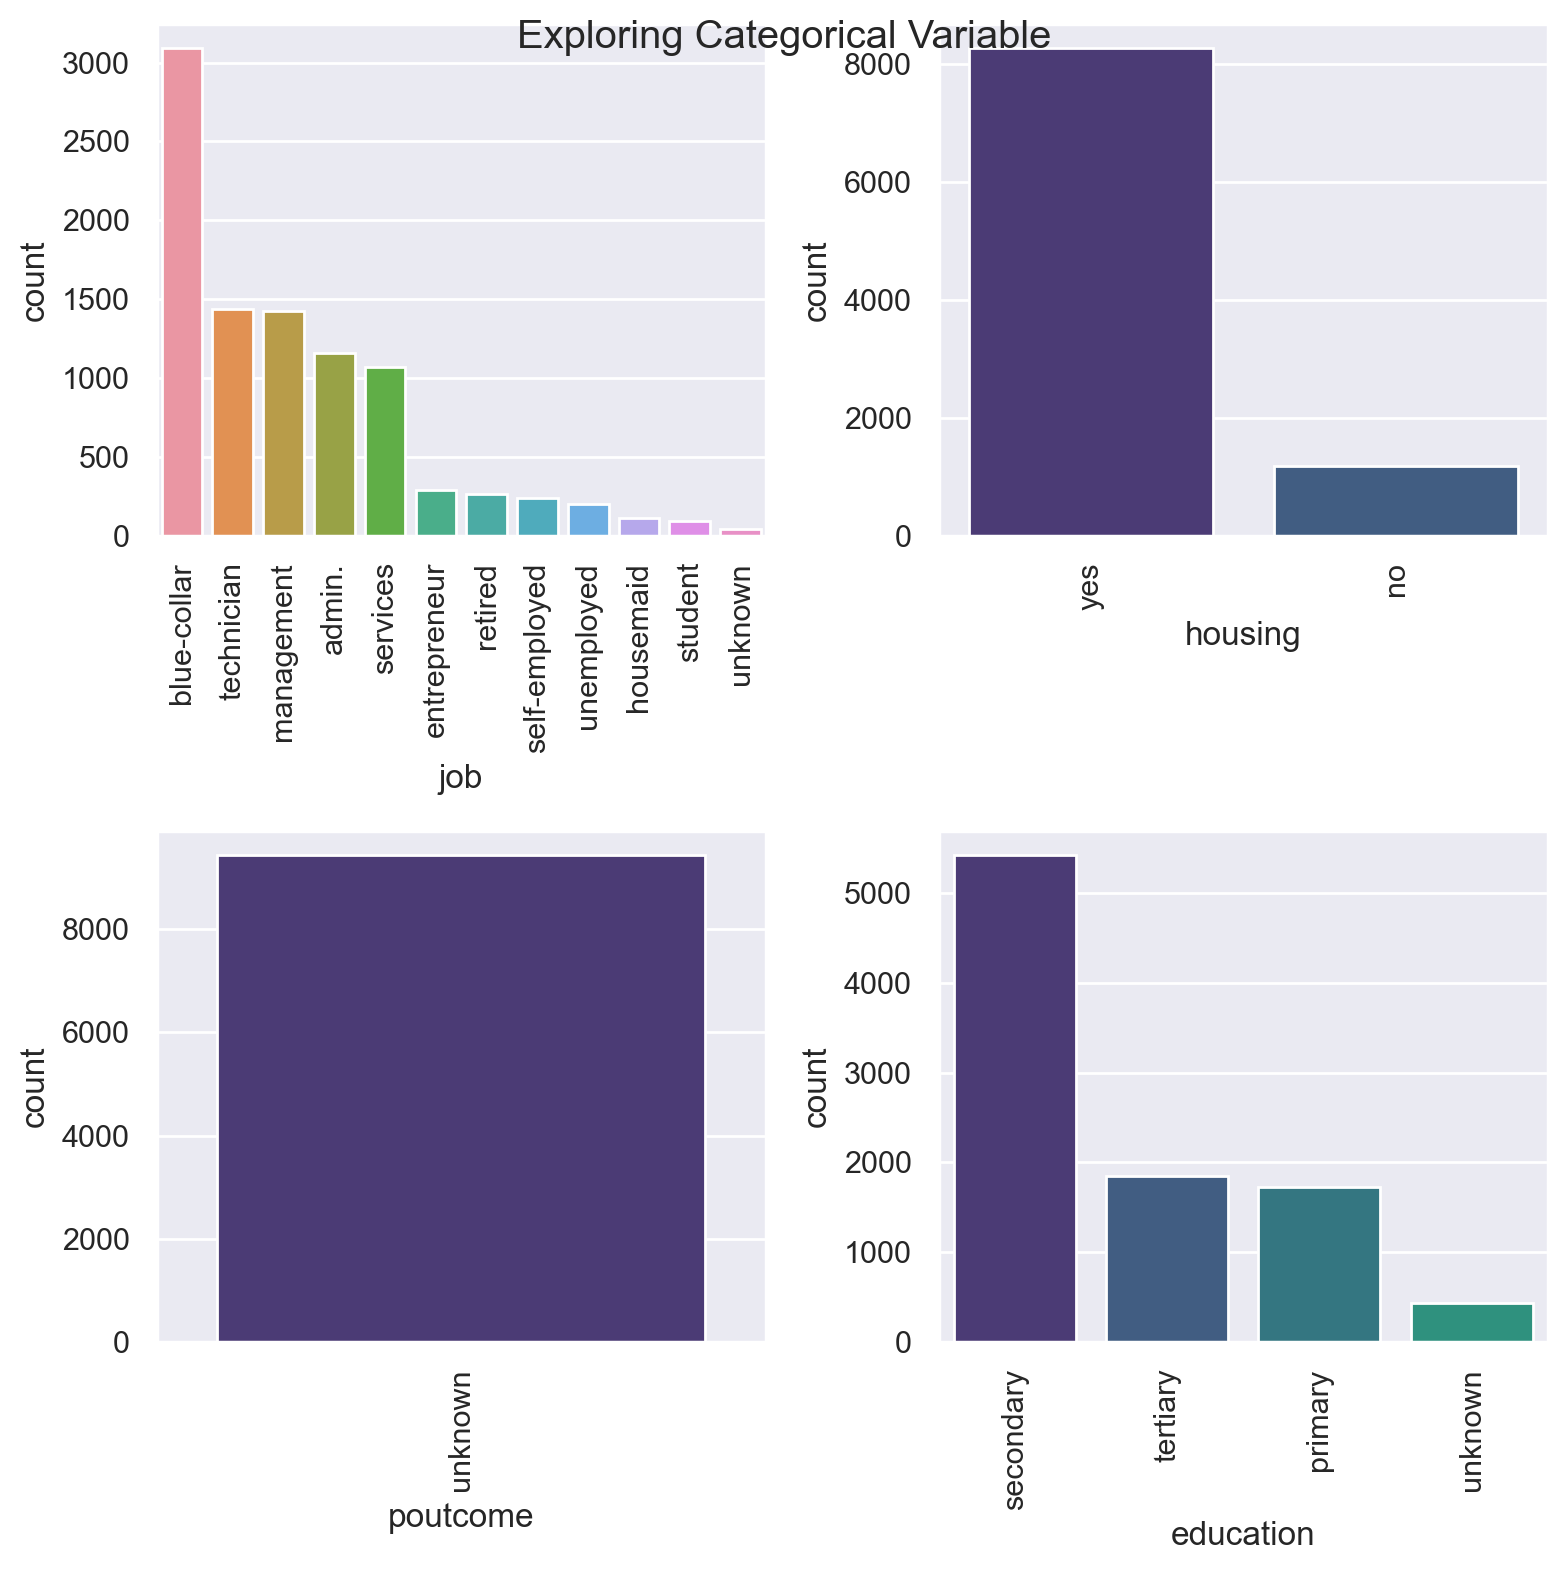

In [16]:
plt.figure(figsize=(8,8),dpi=200)
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'job',order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(2,2,2)
sns.countplot(data = df, x = 'housing', order=df['housing'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'poutcome',order=df['poutcome'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(2,2,4)
sns.countplot(data = df, x = 'education', order=df['education'].value_counts().index)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.suptitle('Exploring Categorical Variable')
plt.show()

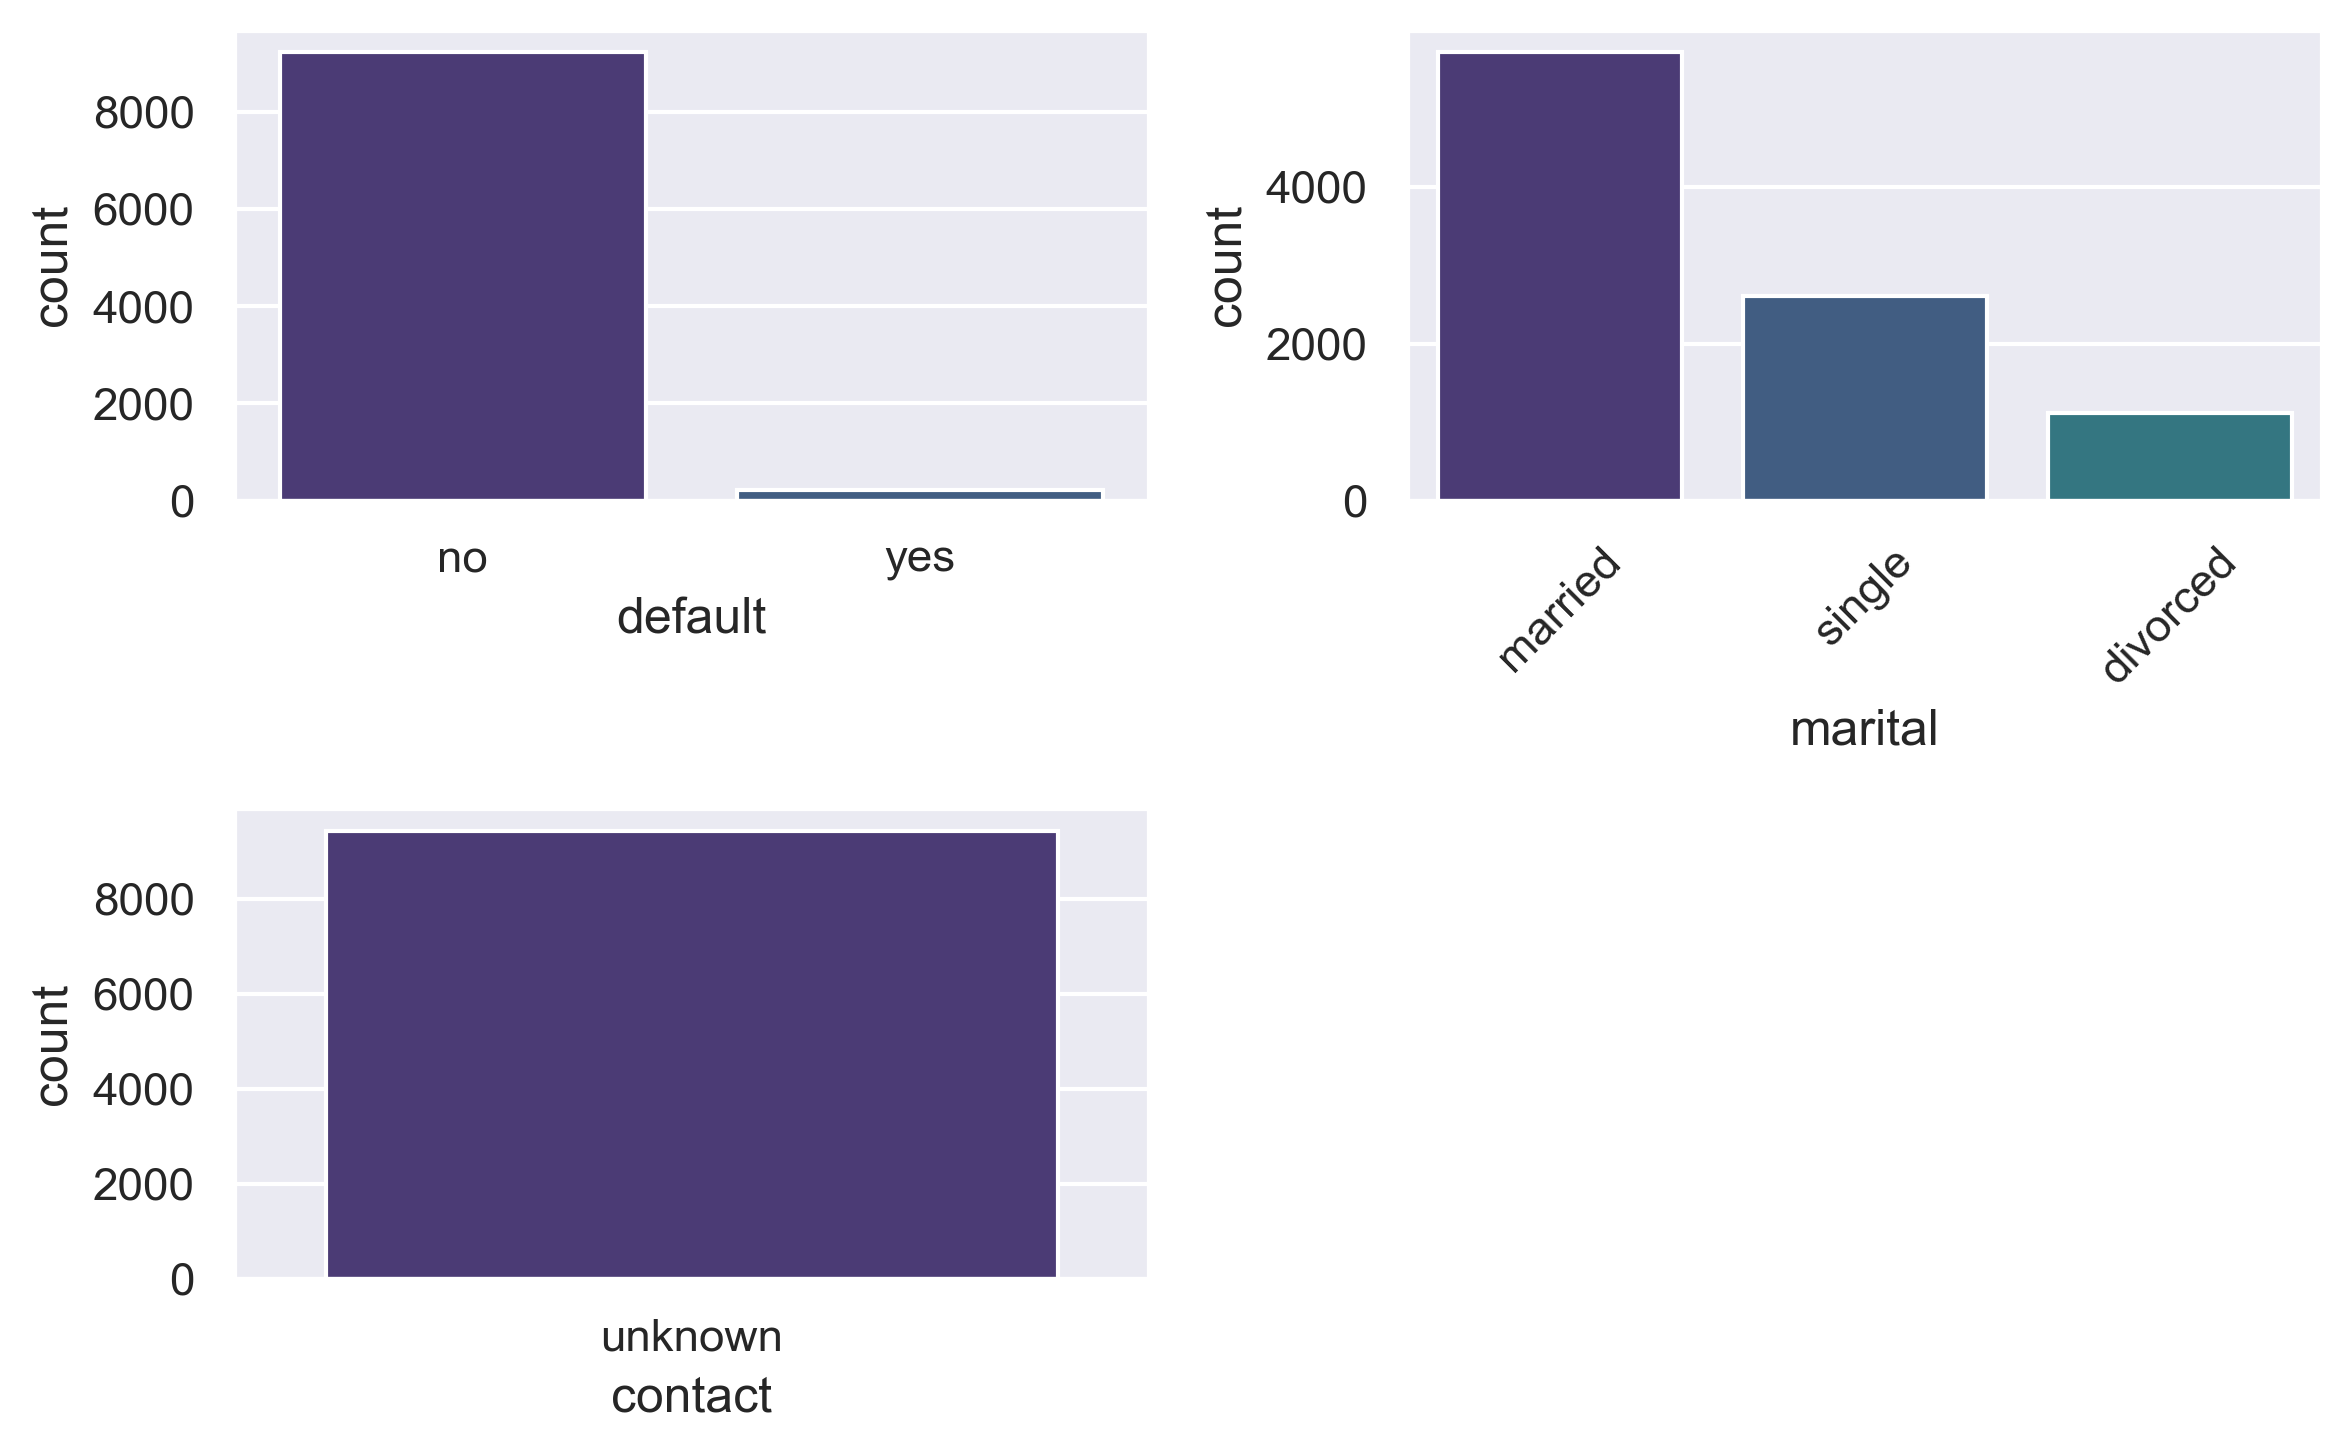

In [17]:
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'default')
plt.subplot(2,2,2)
sns.countplot(data = df, x = 'marital')
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'contact')
plt.tight_layout()

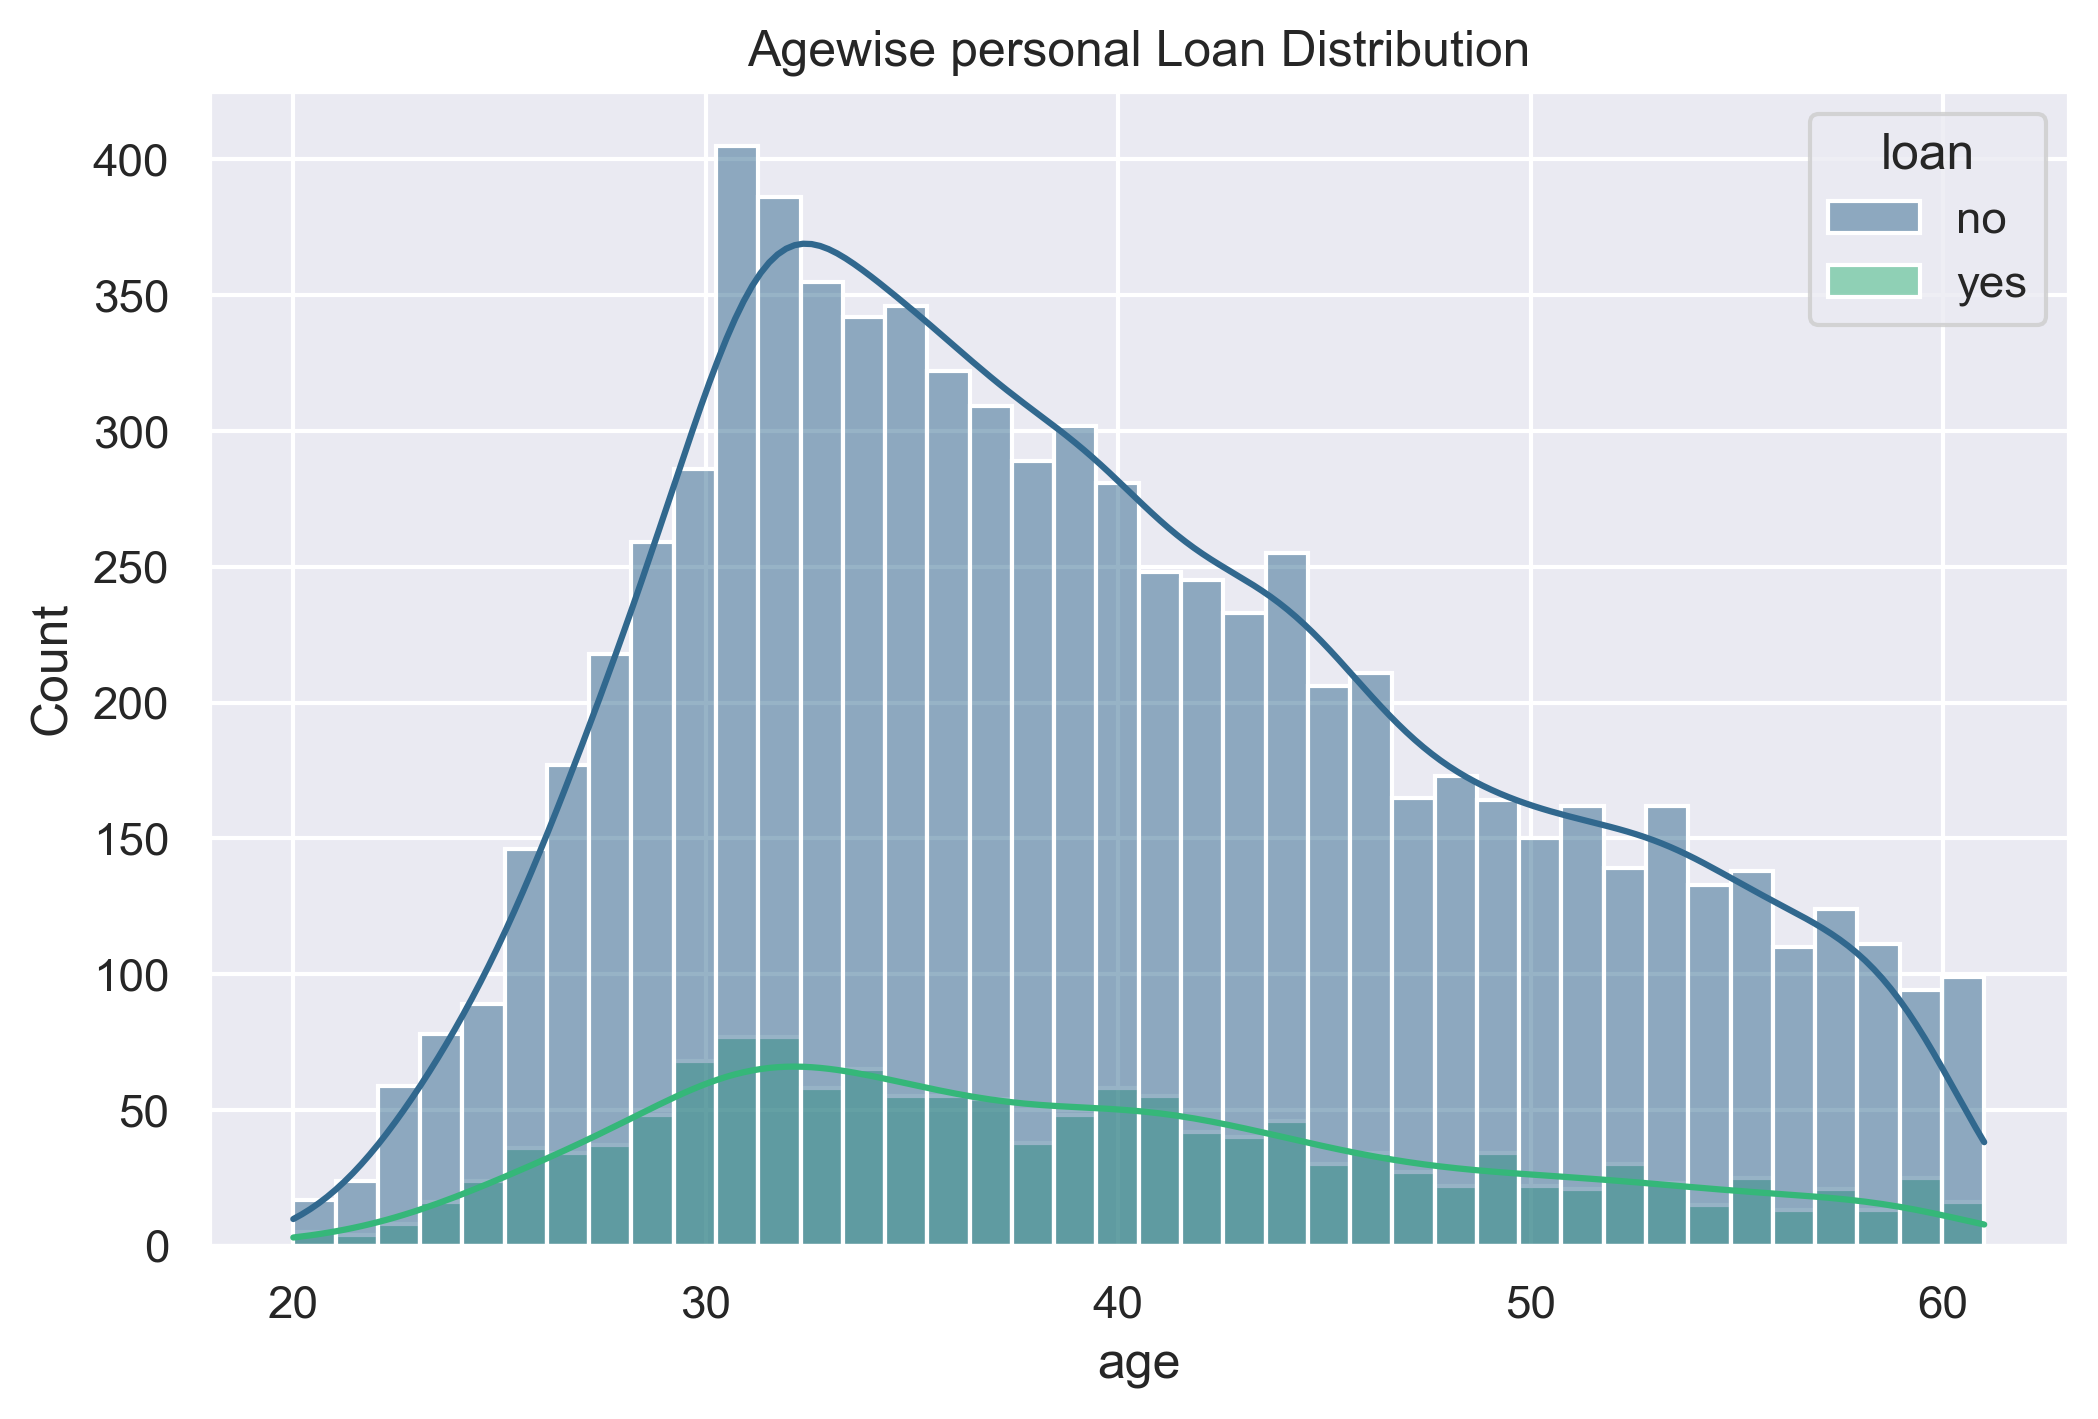

In [18]:
sns.histplot(data = df, x = 'age', bins = 40, hue = 'loan', palette='viridis', kde='TRUE')
plt.title('Agewise personal Loan Distribution')
plt.show()

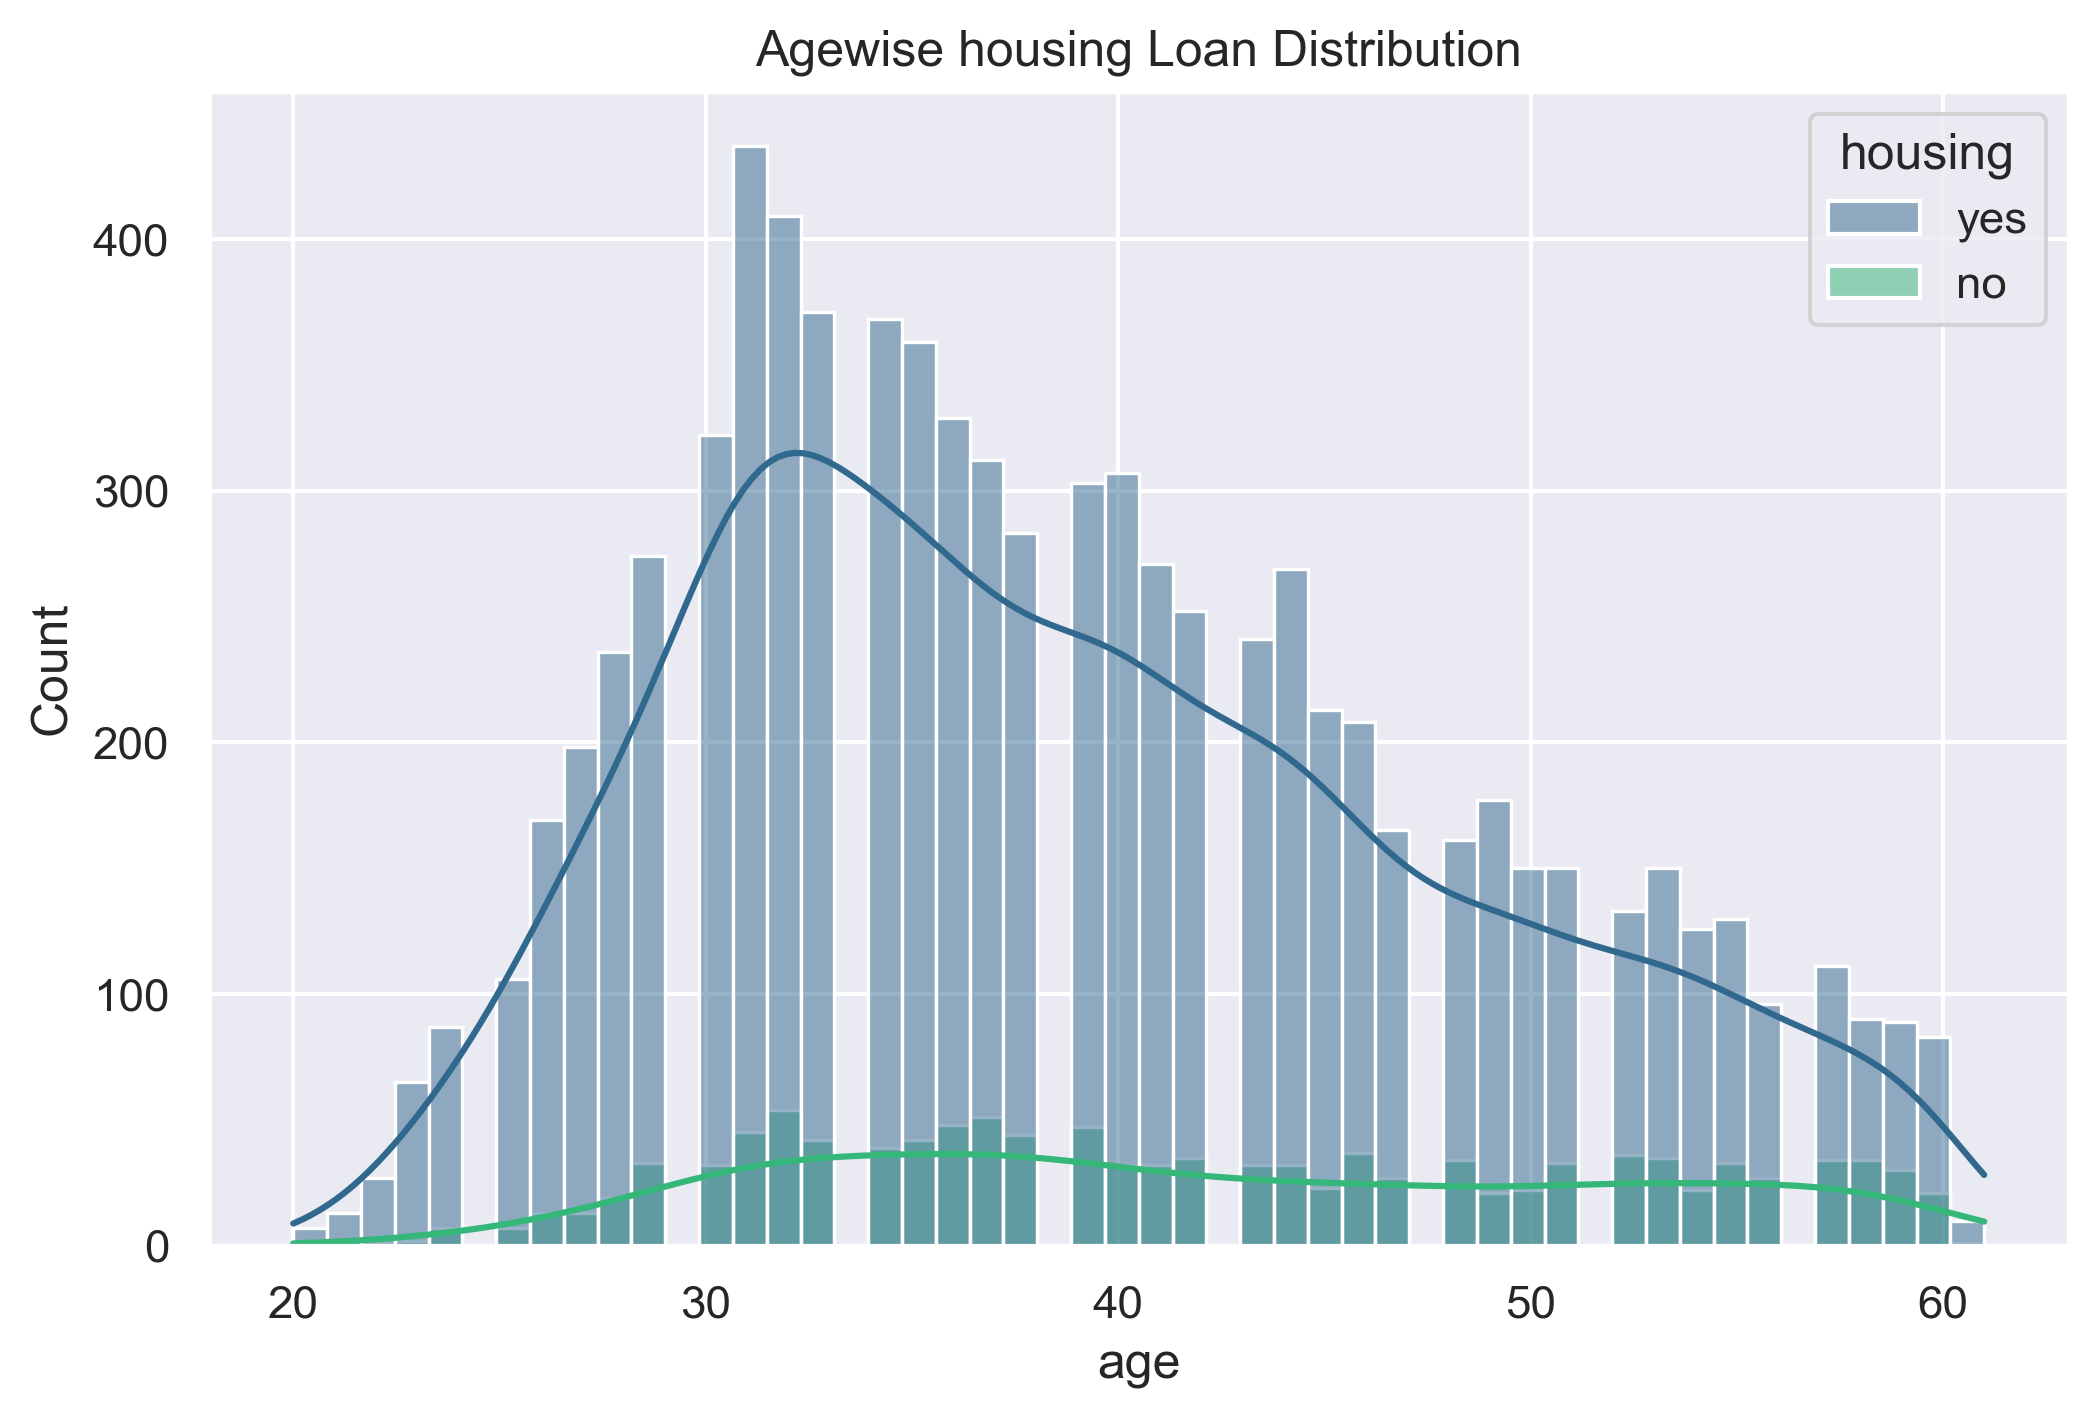

In [19]:
sns.histplot(data = df, x = 'age', bins = 50, hue = 'housing', palette='viridis', kde='TRUE')
plt.title('Agewise housing Loan Distribution')
plt.show()

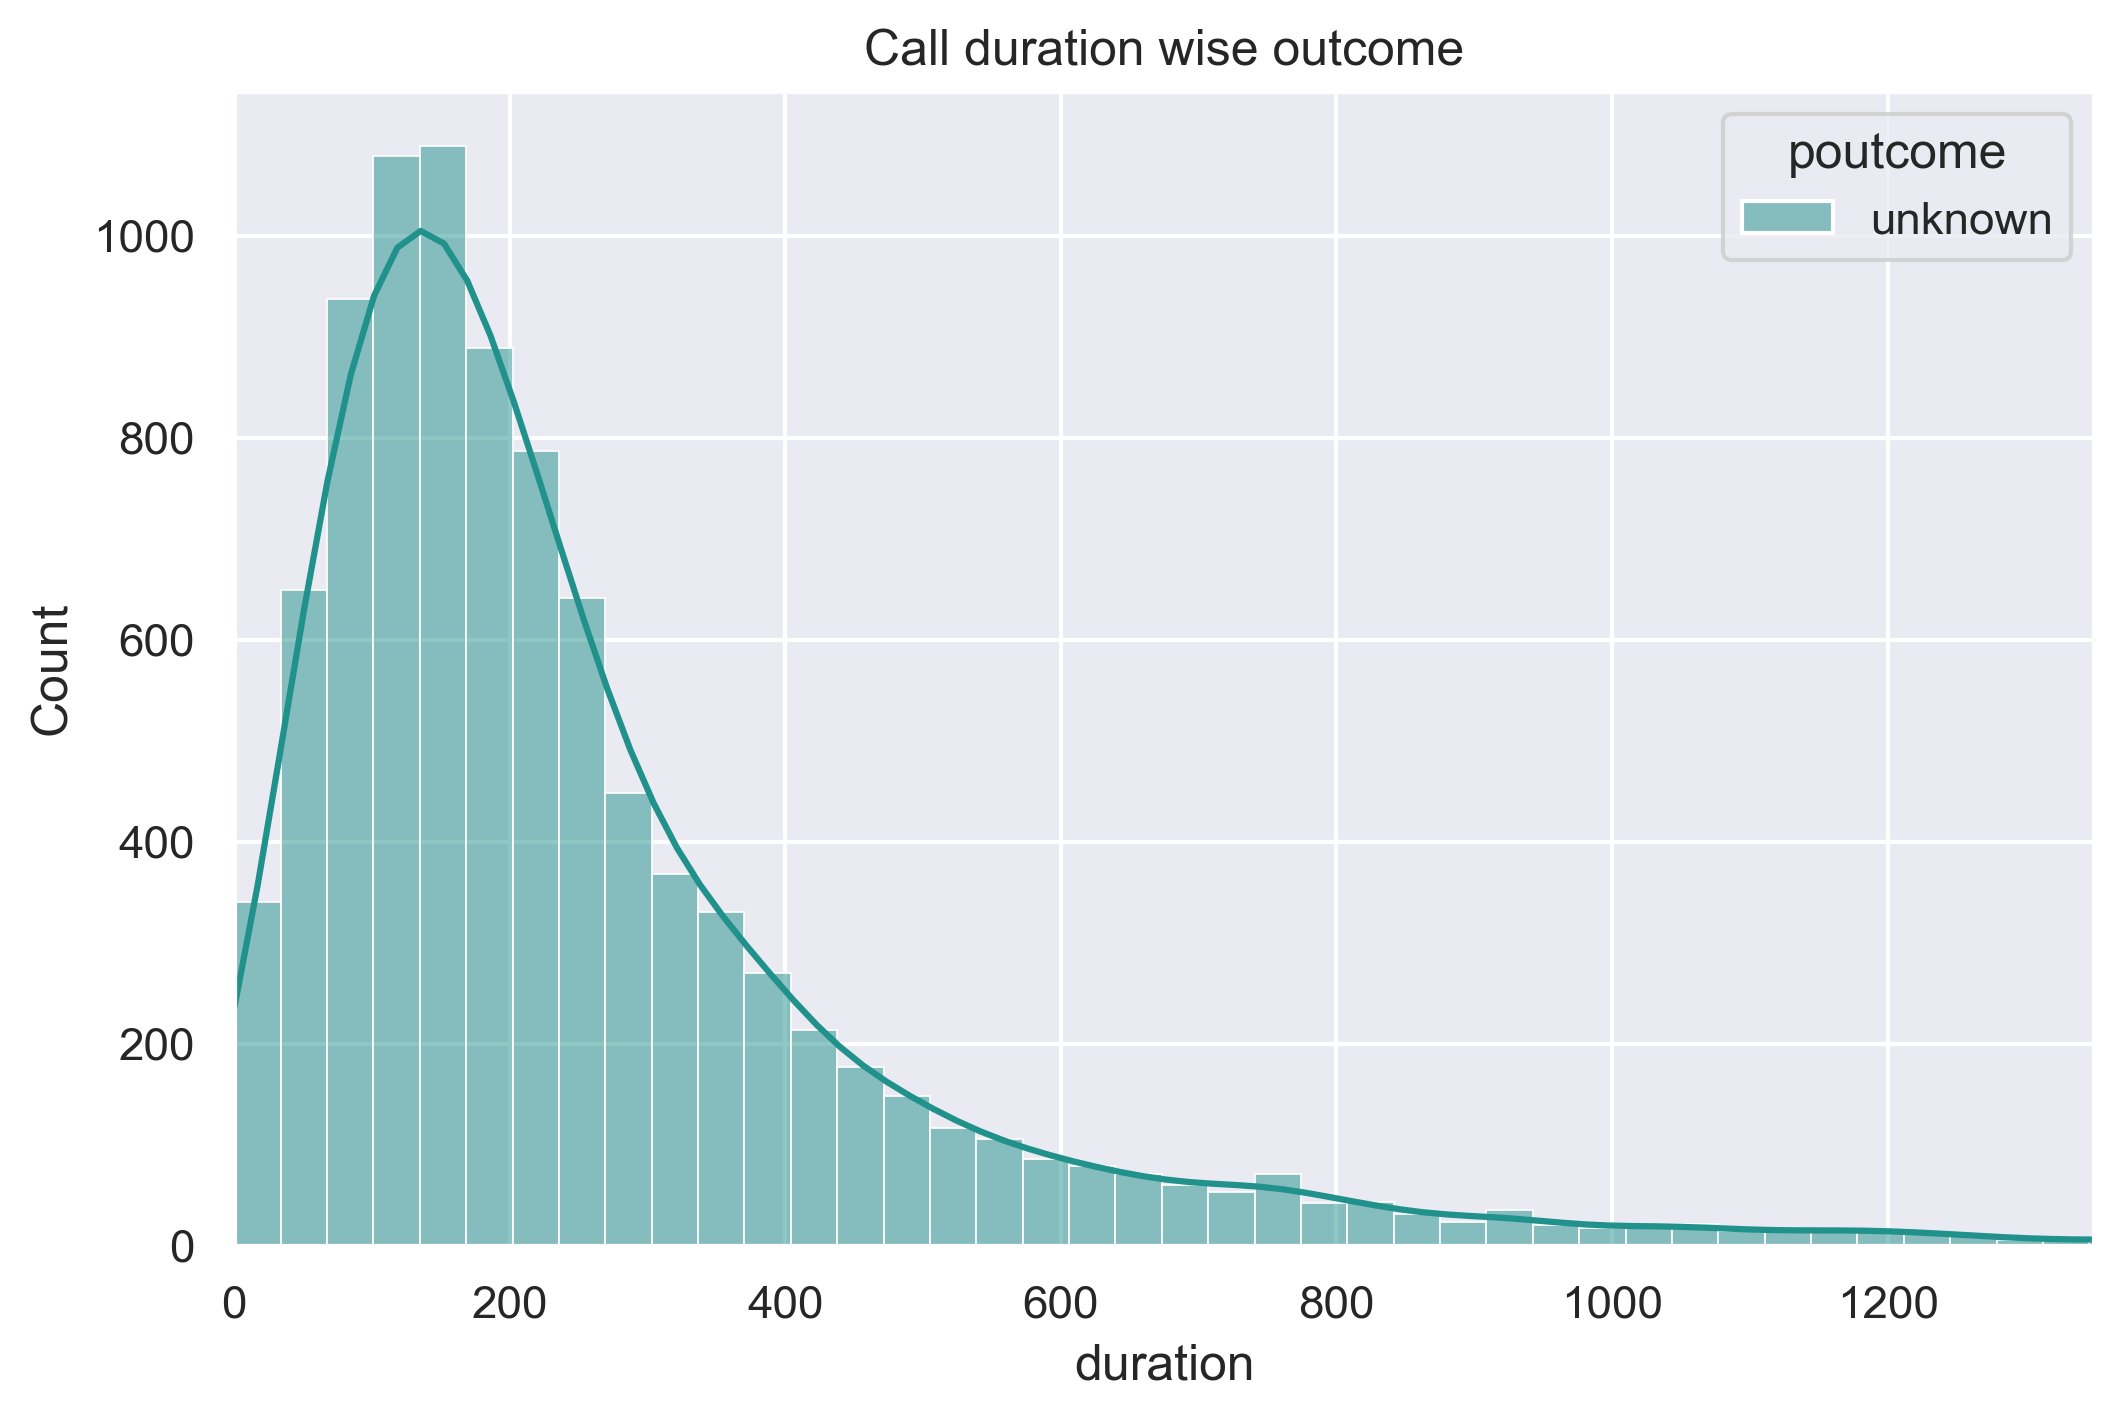

In [20]:
sns.histplot(data = df, x = 'duration', bins = 100, hue = 'poutcome', palette='viridis', kde='TRUE')
plt.title('Call duration wise outcome')
plt.xlim(0,1350)
plt.show()

### Visualization interpretation
- most of the clients are doing blue collared jobs followed by technician, management, admin, etc
- the maximum outcome of campaign related to subscription of bank term deposit across all job categories is 'NO' not suscribed
- maximum number of clients have  housing loans
- maximum number of clients have completed Secondary education
- most number of clients are married
- maximum cliets do not have a credit default
- genrally housing loan is taken by clients within range of 30 to 40 years old
- very less number of clients have taken personal loan, the general age range is 30 to 50 for those who have taken any personal loan
- most of the call lasted around 200 seconds & the outcome of all the calls is unknown

In [21]:
df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no  
1    5   may       151         1     -1         0  unknown  no

In [22]:
df['poutcome'].unique()

array(['unknown'], dtype=object)

In [23]:
# dropping poutcome as it has constant value across & shows 0 variance, would not be helfull for our data
df.drop('poutcome',axis = 1, inplace=True)

## data Encoding & Data Splititng

In [24]:
# splitting the data into feature and target variable
x = df.drop('y', axis = 1)
y = df['y']

In [25]:
# perfroming one-hot-encoding on features
x = pd.get_dummies(x)

# performing Label encoding on target column
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
x

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0      58     2143    5       261         1     -1         0           0   
1      44       29    5       151         1     -1         0           0   
2      33        2    5        76         1     -1         0           0   
3      47     1506    5        92         1     -1         0           0   
4      33        1    5       198         1     -1         0           0   
...   ...      ...  ...       ...       ...    ...       ...         ...   
9426   37      657    6       227         1     -1         0           0   
9427   39     -540    6        29         1     -1         0           0   
9428   34      139    6        52        13     -1         0           0   
9429   53       66    6       360         2     -1         0           0   
9430   50      746    6       136        13     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  education_unknown  default_no  \
0                   0                 0  ...                  0           1   
1                   0                 0  ...                  0           1   
2                   0                 1  ...                  0           1   
3                   1                 0  ...                  1           1   
4                   0                 0  ...                  1           1   
...               ...               ...  ...                ...         ...   
9426                0                 0  ...                  0           1   
9427                0                 0  ...                  0           1   
9428                0                 0  ...                  0           1   
9429                1                 0  ...                  0           1   
9430                1                 0  ...                  0           1   

      default_yes  housing_no  housing_yes  loan_no  loan_yes  \
0               0           0            1        1         0   
1               0           0            1        1         0   
2               0           0            1        0         1   
3               0           0            1        1         0   
4               0           1            0        1         0   
...           ...         ...          ...      ...       ...   
9426            0           1            0        1         0   
9427            0           1            0        1         0   
9428            0           0            1        0         1   
9429            0           1            0        1         0   
9430            0           0            1        1         0   

      contact_unknown  month_jun  month_may  
0                   1          0          1  
1                   1          0          1  
2                   1          0          1  
3                   1          0          1  
4                   1          0          1  
...               ...        ...        ...  
9426                1          1          0  
9427                1          1          0  
9428                1          1          0  
9429                1          1          0  
9430                1          1          0  

[9431 rows x 35 columns]

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9431 non-null   int64
 1   balance              9431 non-null   int64
 2   day                  9431 non-null   int64
 3   duration             9431 non-null   int64
 4   campaign             9431 non-null   int64
 5   pdays                9431 non-null   int64
 6   previous             9431 non-null   int64
 7   job_admin.           9431 non-null   uint8
 8   job_blue-collar      9431 non-null   uint8
 9   job_entrepreneur     9431 non-null   uint8
 10  job_housemaid        9431 non-null   uint8
 11  job_management       9431 non-null   uint8
 12  job_retired          9431 non-null   uint8
 13  job_self-employed    9431 non-null   uint8
 14  job_services         9431 non-null   uint8
 15  job_student          9431 non-null   uint8
 16  job_technician       943

In [28]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [30]:
x_train

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
736    40       -7    6       410         2     -1         0           0   
9088   56      206    5       315         1     -1         0           0   
3820   39       95   16       230         1     -1         0           0   
2235   24     1535   12       126         2     -1         0           0   
1860   37      447    9      1170         1     -1         0           0   
...   ...      ...  ...       ...       ...    ...       ...         ...   
599    31        0    6        36         5     -1         0           0   
5695   50     1651   26        41         2     -1         0           1   
8006   33     -244    2        63         2     -1         0           0   
1361   41      205    8        91         1     -1         0           0   
1547   53      359    8       238         8     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  education_unknown  default_no  \
736                 1                 0  ...                  0           1   
9088                1                 0  ...                  0           1   
3820                1                 0  ...                  0           1   
2235                0                 0  ...                  0           1   
1860                0                 0  ...                  0           1   
...               ...               ...  ...                ...         ...   
599                 0                 0  ...                  0           1   
5695                0                 0  ...                  0           1   
8006                0                 0  ...                  0           1   
1361                0                 0  ...                  0           1   
1547                1                 0  ...                  0           1   

      default_yes  housing_no  housing_yes  loan_no  loan_yes  \
736             0           0            1        1         0   
9088            0           1            0        1         0   
3820            0           0            1        1         0   
2235            0           0            1        1         0   
1860            0           0            1        1         0   
...           ...         ...          ...      ...       ...   
599             0           0            1        1         0   
5695            0           0            1        1         0   
8006            0           0            1        1         0   
1361            0           0            1        1         0   
1547            0           1            0        0         1   

      contact_unknown  month_jun  month_may  
736                 1          0          1  
9088                1          1          0  
3820                1          0          1  
2235                1          0          1  
1860                1          0          1  
...               ...        ...        ...  
599                 1          0          1  
5695                1          0          1  
8006                1          1          0  
1361                1          0          1  
1547                1          0          1  

[7544 rows x 35 columns]

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0])

## Data Standardization

In [32]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Building

In [33]:
# creating a model instance
model  = LogisticRegression()

In [34]:
# training the model
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
#checking model coefficients
model.coef_

array([[ 0.04180969, -0.06171594,  0.38871308,  1.30715058, -0.02187617,
         0.        ,  0.        ,  0.04611993, -0.03121205,  0.03512447,
         0.01088423, -0.02357486,  0.06064876, -0.03877527, -0.03176348,
        -0.18272053,  0.02925928,  0.06524782,  0.06226225,  0.18931735,
        -0.21110155,  0.09325265,  0.06564633, -0.01233651, -0.00163356,
        -0.09075256, -0.03574442,  0.03574442, -0.0812565 ,  0.0812565 ,
         0.06999324, -0.06999324,  0.        ,  0.23557958, -0.23557958]])

In [36]:
# making predictions based on x_test
y_pred = model.predict(x_test)

## Model Evaluation

### checking for overfitting & underfitting

In [37]:
# checking training accuracy
model.score(x_train,y_train)

0.9672587486744433

In [38]:
#checking testing accuracy
model.score(x_test,y_test)

0.9666136724960255

**As the training & testing Accuracy very similar therefore we can conclude that the model is performing in generalized way**

In [39]:
# overall accuracy of model
accuracy_score(y_test,y_pred)

0.9666136724960255

In [40]:
confusion_matrix(y_test,y_pred)

array([[1802,   15],
       [  48,   22]], dtype=int64)

<Axes: >

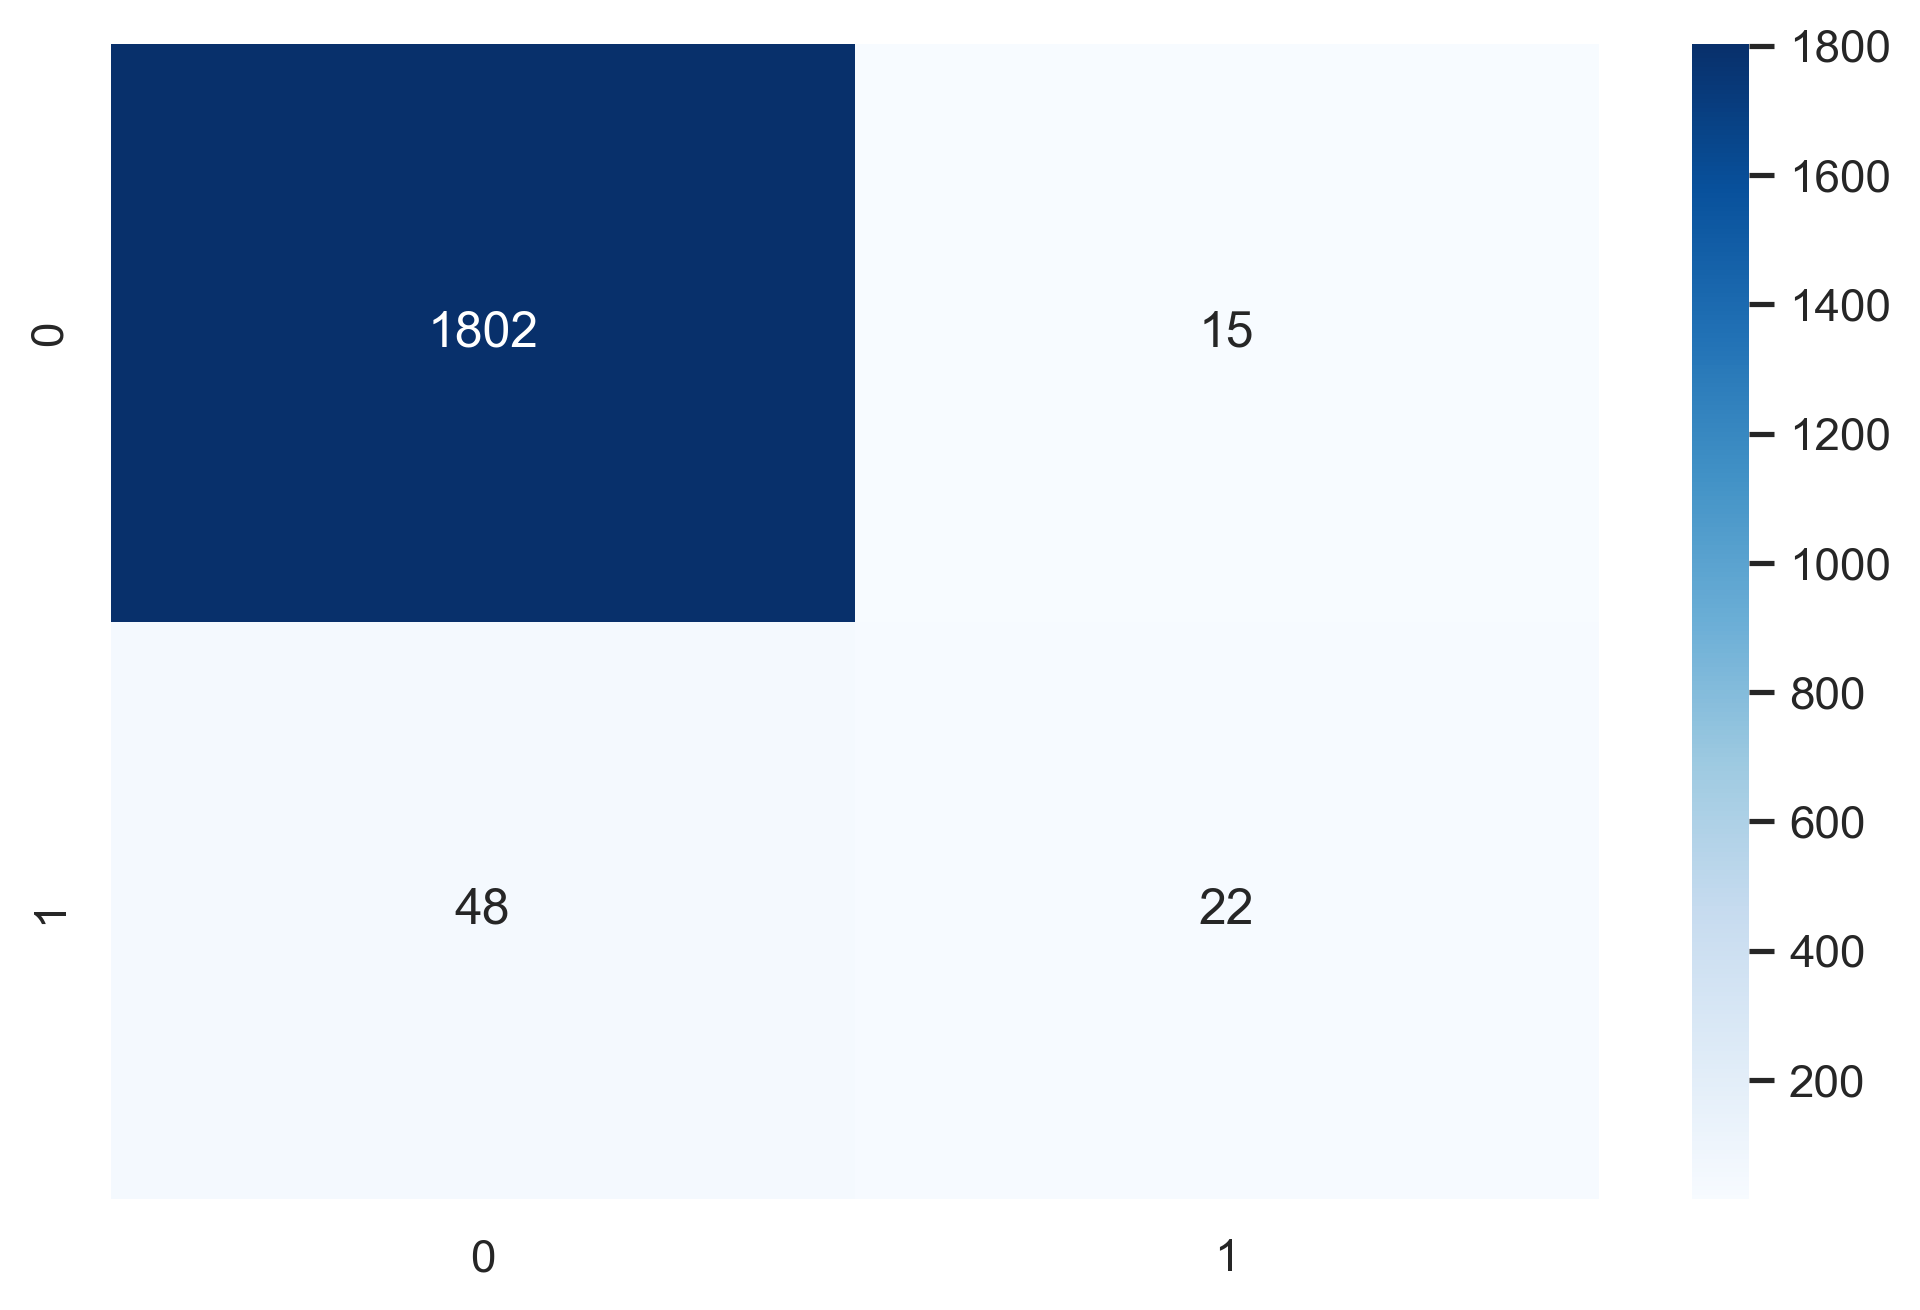

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt = 'g',cmap = 'Blues')

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1817
           1       0.59      0.31      0.41        70

    accuracy                           0.97      1887
   macro avg       0.78      0.65      0.70      1887
weighted avg       0.96      0.97      0.96      1887



#### Interpretation 
- **As the data is imbalanced we can't directly rely on just accuracy, therefore we check for Recall and precsision**
- **Recall and precision for 0 is very good as the count of 0's is much more than 1's, hence model can predict for 0 values with accuratly**
- **Recall and precision for 1's is poor due to imbalance in count of 1's and 0's**

In [43]:
# generating probability estimates
proba = model.predict_proba(x_test)[:,1]
proba

array([0.01298058, 0.00432417, 0.46863701, ..., 0.02297613, 0.00342399,
       0.00433698])

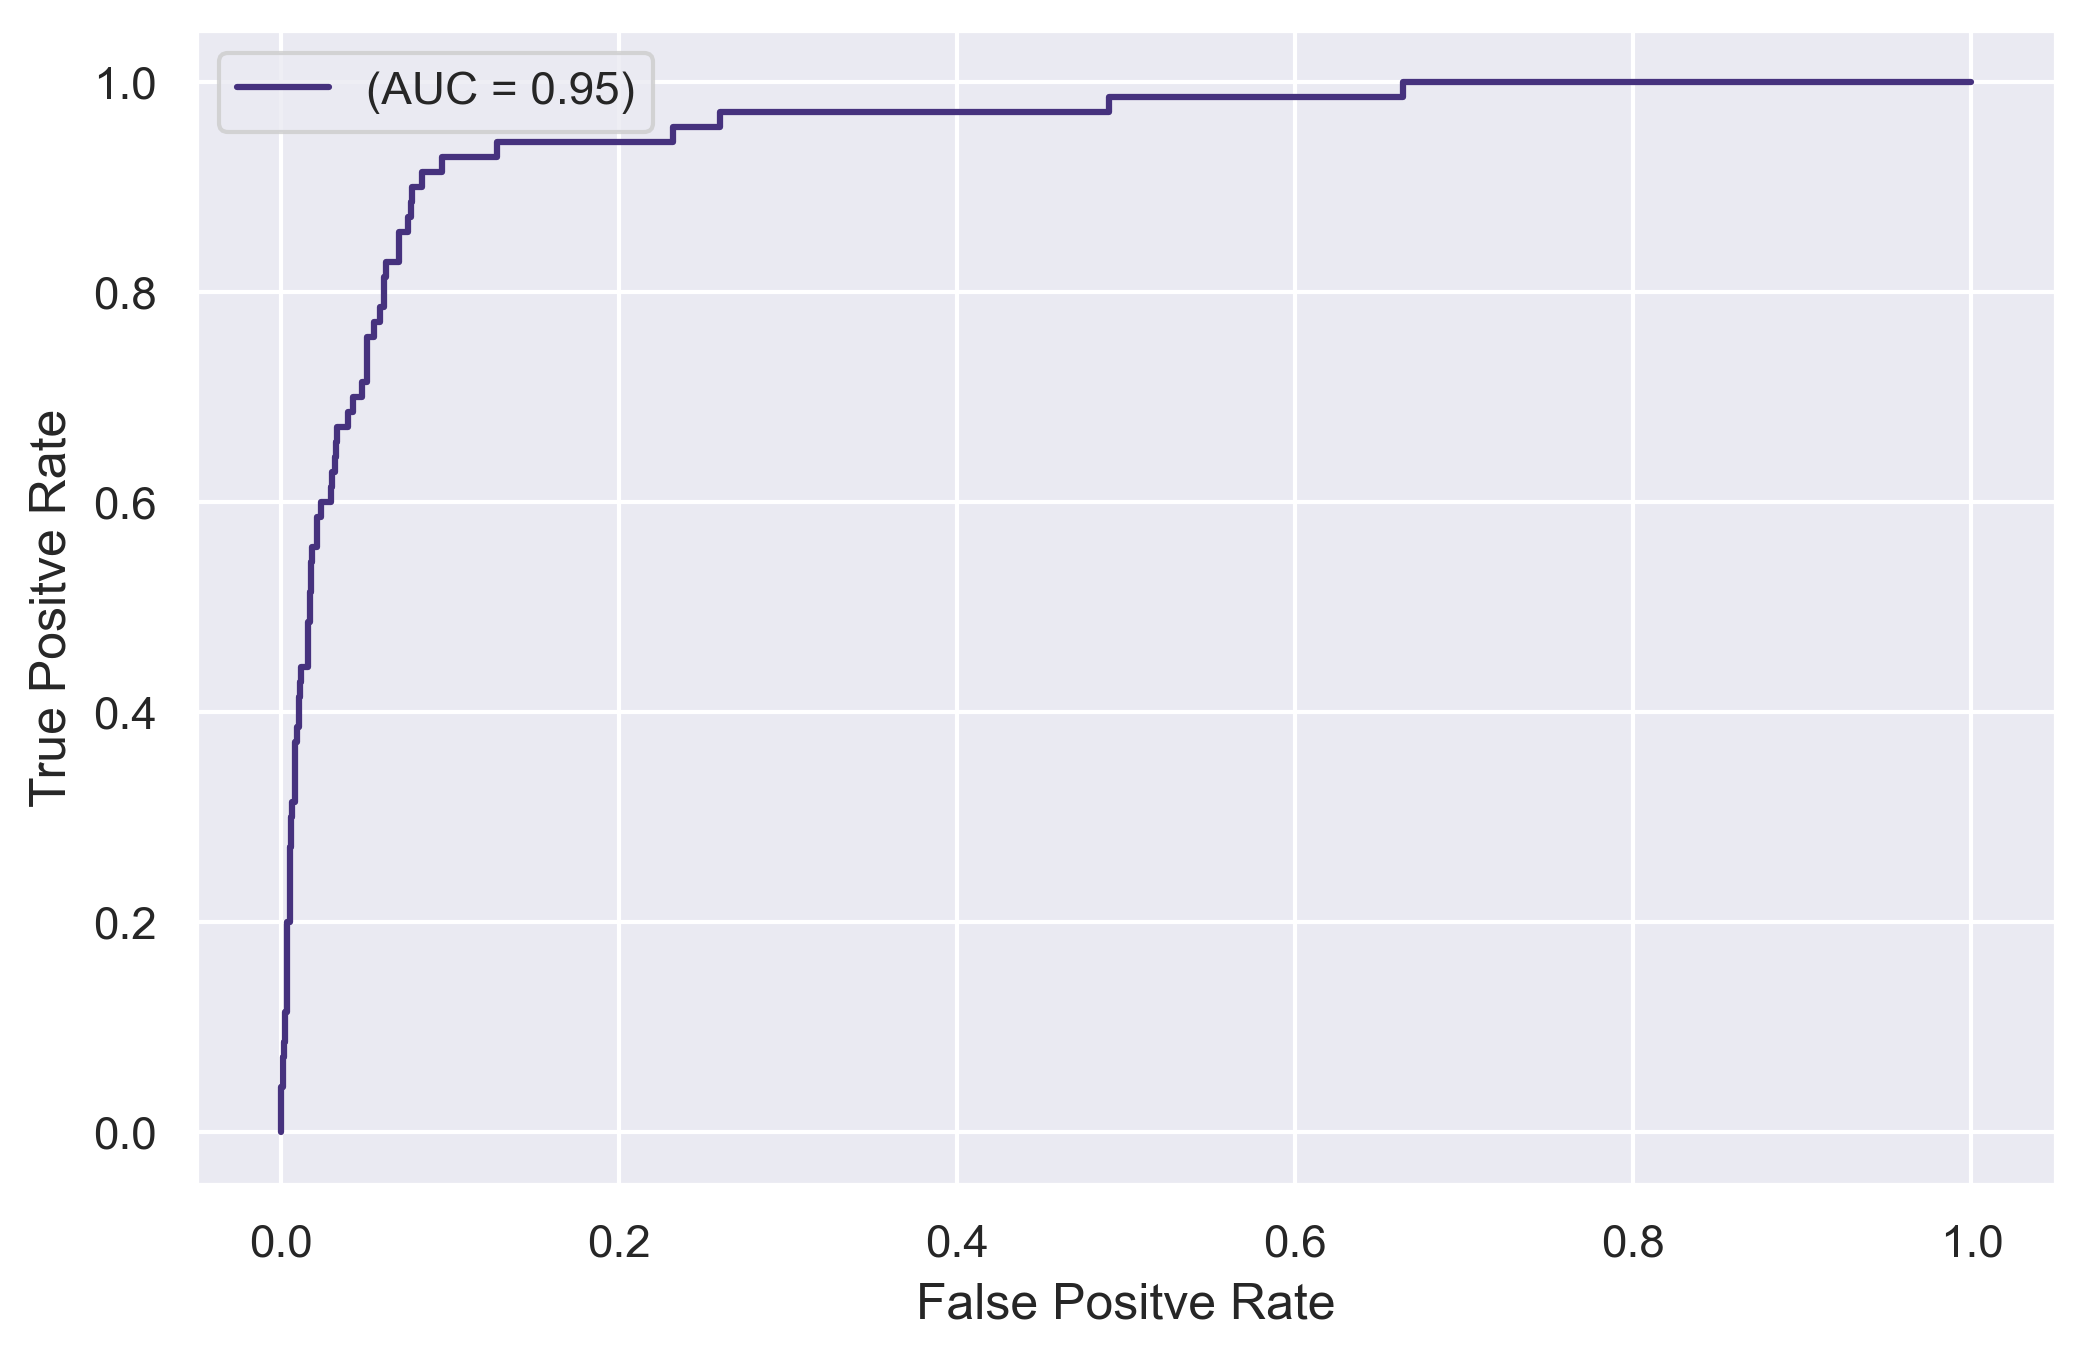

In [46]:
# creating ROC curve
auc = roc_auc_score(y_test,proba)
fpr,tpr, threshold = roc_curve(y_test,proba)
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [45]:
auc

0.9508137432188065

#### overall model is performing good in predicitng 0's, due to imbalance in dataset model performance for 1's is moderate.
- note* to eleminate imbalance we can perfrom sampling  